<a href="https://colab.research.google.com/github/Arjundeshpande/unalive/blob/main/EBC_sprinkling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[203 186 230 212 188 211 199 189 173 236]


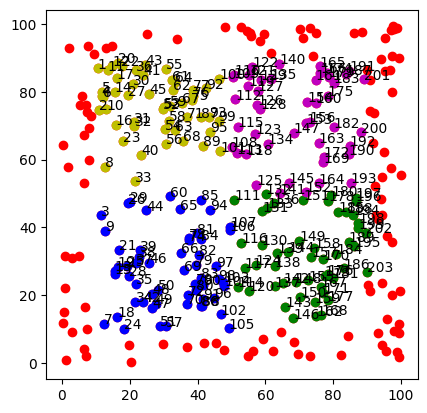

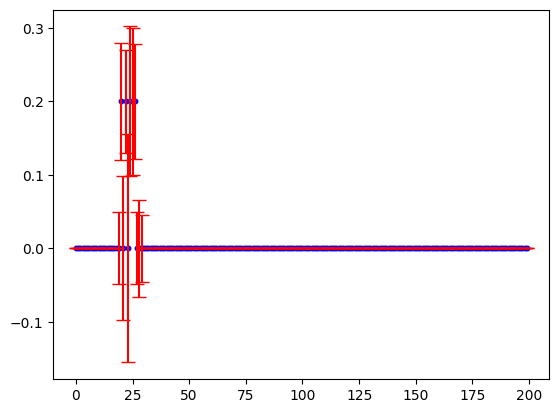

Time:  102.397748685


In [ ]:
#EdgeBiasCompensation plus subinterval sprinkling
#Longest Path length Distribution.
#NOT NEEDED

import math
import numpy as np
import matplotlib.pyplot as plt
from array import array
from numpy.random import default_rng
import timeit
import csv
import pandas as pd
import scipy.stats as stats
from scipy.stats import chisquare
from array import array
start = timeit.default_timer()
# Parameters
sd_rep=10
ExpVal=200 #Expected value of Poisson Distribution
NoS=10 #Number of Sprinklings per Poisson Distribution
rng = np.random.default_rng()
n = rng.poisson(ExpVal, NoS) # number of points

print(n)
a = 100 # upper bound
b = 0 # lower bound
mem_num=0
memory = []
sd_memory = [[0 for x in range(ExpVal)] for y in range(sd_rep)]



def longest_path_matrix(R, dmax=None):
    N = n[f]
    if dmax is None:
        dmax = N
    LP = np.zeros((N, N))
    i = 1
    B = R
    while np.sum(B) > 0.:
        path_exist = np.sign(B)
        path_length = i * path_exist
        LP = np.maximum.reduce((LP, path_length))
        B = np.dot(B, R)
        i += 1
        if i == dmax:
            return LP
    return LP

def edge_bias_compensation(target_a, target_b, target_c, graph_points): # function which returns a set of sprinkled points with edge-points eliminated
  extra=0
  fcoordy = (b-a)* np.random.random_sample((n[f],))+a # generate random y
  fcoordx = (b-a)* np.random.random_sample((n[f],))+a # generate random x
  new_n=0   # the new number of points
  for i in range(n[f]):
        if (fcoordy[i] >target_a and fcoordy[i]<target_b and fcoordx[i] >target_a and fcoordx[i]<target_b):
          new_n= new_n+1   # extract new number of points
  while new_n < n[f]:
    fcoordy = np.hstack((fcoordy, [(b-a)* np.random.random_sample()+a]))
    fcoordx = np.hstack((fcoordx, [(b-a)* np.random.random_sample()+a]))
    if (fcoordy[n[f]+extra] >target_a and fcoordy[n[f]+extra]<target_b and fcoordx[n[f]+extra] >target_a and fcoordx[n[f]+extra]<target_b):
      new_n +=1   # extra points to fill smaller box
    extra += 1 # how many additional points are added
  coord1x=np.zeros(n[f])   # generate empty x
  coord1y=np.zeros(n[f])   # generate empty y
  coord2x=np.zeros(n[f])   # generate empty x
  coord2y=np.zeros(n[f])   # generate empty y
  coord3x=np.zeros(n[f])   # generate empty x
  coord3y=np.zeros(n[f])   # generate empty y
  coord4x=np.zeros(n[f])   # generate empty x
  coord4y=np.zeros(n[f])   # generate empty y
  coordx=np.zeros(n[f])   # generate empty x
  coordy=np.zeros(n[f])   # generate empty y

  count=0
  if(sno== 0 and rep== 0 and graph_points!= 0):  # plotting colored causal diamond for visualizing the Edge Bias Compensation (RED - Rejected Points)
    for i in range(n[f]+extra):
      plt.plot(fcoordx[i],fcoordy[i],'ro')

  for i in range(n[f]+extra):
    if (fcoordy[i] >=target_a and fcoordy[i]<=target_c and fcoordx[i] >=target_a and fcoordx[i]<=target_c):
      coord1y[count]=fcoordy[i]   # copy valid x
      coord1x[count]=fcoordx[i]   # copy valid y
      count=count+1
    elif (fcoordy[i] >=target_c and fcoordy[i]<=target_b and fcoordx[i] >=target_c and fcoordx[i]<=target_b):
      coord2y[count]=fcoordy[i]   # copy valid x
      coord2x[count]=fcoordx[i]   # copy valid y
      count=count + 1
    elif (fcoordy[i] >=target_c and fcoordy[i]<=target_b and fcoordx[i] >=target_a and fcoordx[i]<=target_c):
      coord3y[count]=fcoordy[i]   # copy valid x
      coord3x[count]=fcoordx[i]   # copy valid y
      count =count + 1
    elif (fcoordy[i] >=target_a and fcoordy[i]<=target_c and fcoordx[i] >=target_c and fcoordx[i]<=target_b):
      coord4y[count]=fcoordy[i]   # copy valid x
      coord4x[count]=fcoordx[i]   # copy valid y
      count =count + 1

  coordx=coord1x+coord2x+coord3x+coord4x
  coordy=coord1y+coord2y+coord3y+coord4y
  index = np.argsort(coordx) # declare index array
  if(sno== 0 and rep== 0 and graph_points!=0):   # plotting colored causal diamond for visualizing the Edge Bias Compensation (BLUE - Valid points)
    arra=0
    arrb=0
    arrc=0
    arrd=0
    for i in range(n[f]):
      if (coord1x[index[i]] !=0):
        arr=np.array(coord1x[index[i]])
        arra += 1
        plt.plot(coord1x[index[i]],coord1y[index[i]],'bo')
        plt.text(coord1x[index[i]],coord1y[index[i]], i+1)
      if (coord2x[index[i]] !=0):
        plt.plot(coord2x[index[i]],coord2y[index[i]],'mo')
        plt.text(coord2x[index[i]],coord2y[index[i]], i+1)
        arrb += 1
      if (coord3x[index[i]] !=0):
        plt.plot(coord3x[index[i]],coord3y[index[i]],'yo')
        plt.text(coord3x[index[i]],coord3y[index[i]], i+1)
        arrc += 1
      if (coord4x[index[i]] !=0):
        plt.plot(coord4x[index[i]],coord4y[index[i]],'go')
        plt.text(coord4x[index[i]],coord4y[index[i]], i+1)
        arrd += 1
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
  return coordx, coordy, index, n[f]   # returns x and y coordinates of all valid points & index array & new count



# Initialize relation Matrix
for k in range(sd_rep):
  rep=k

  memory=[0 for x in range(ExpVal)]  # reset memory of number of longest paths counted per Poisson distribution
  for f in range(NoS):
    sno=f  # sno = sprinkling number
    new_n=0
    save_n=n[f]  # used for saving, in memory, the initial value of n[f] generated by the Poisson distribution
    coordx, coordy, index, n[f]= edge_bias_compensation(10, 90, 50, 1)   # call Edge Bias Compensation function, save data
    R = [[0 for x in range(n[f])] for y in range(n[f])]
    L = [[0 for x in range(n[f])] for y in range(n[f])]

    # Calculate Relation Matrix
    for i in range(n[f]):
        for j in range (n[f]):
            R[i][j]=0
            if (coordx[index[i]] > coordx[index[j]] and coordy[index[i]] > coordy[index[j]]):
                R[i][j]=1

  # Calculate Link Matrix
    for i in range(n[f]):
        for j in range (n[f]):
            L[i][j]=0
            if(R[i][j]==0):
                L[i][j]==0
            elif(i>j):
                L[i][j]=1
                for point in range (min(i,j)+1, max(i,j)):
                    if(R[i][point]==1 and R[point][j]==1):
                        L[i][j]=0

    #Calculate avg and proper time longest path length
    _LP=longest_path_matrix(R, dmax=None)
    _LP_int=_LP.astype(int)
    proper_time=0
    for i in range(n[f]):
        for j in range(n[f]):
            if(_LP_int[i][j] > proper_time):
              proper_time=_LP_int[i][j]
    memory[proper_time] +=1

    n[f]=save_n  # reset n[f] to original value for next repetition
  for i in range(ExpVal):
    sd_memory[rep][i]= (memory[i]/NoS)   # save in memory the distribution of longest paths for a given repetition




stnd_dev=np.std(sd_memory, axis=0)   # calculate Standard Deviation
variance=np.var(sd_memory, axis=0)   # calculate Variance
show_rep = 0  # choose which repetition to be graphed range(sd_rep)
for i in range(ExpVal):
  #if(sd_memory[show_rep][i] !=0):  #zero-filter; toggle on/off for different data display
  plt.scatter(i, sd_memory[show_rep][i], linewidths=2, c='b', s=5)
  plt.errorbar(i, sd_memory[show_rep][i], yerr=stnd_dev[i], fmt=' ', ecolor='r', capsize=5)  # substitute yerr=stnd_dev[i] with yerr=variance[i]
  list1 = []   # i don't know exactly how it works, but it does
  for q in range(15):
    list1.append(q)

  list2=list(sd_memory[show_rep])
  list3=stnd_dev.tolist()
  list4=variance.tolist()
  rows = list(zip(list1, list2, list3, list4))

  wtr = csv.writer(open ('EBC_longestpathlengthDistribution.csv', 'w'), delimiter=',', lineterminator='\n')

  for row in rows :
      wtr.writerow (row)

plt.show()

stop = timeit.default_timer()
print('Time: ', stop - start)

[       nan 3.16892428 3.00107352 3.09461444 2.88523966 2.82758529
 3.14329196 3.07286376 3.05016301 2.9880228  3.11506476 3.08542056
 2.97339784 2.92603628 2.89887084 3.08398609 3.01883282 3.05116733
 3.18018848 3.02355703 3.26701892 3.08242616 2.85973639 3.00050359
 3.0884583  3.0285468  2.84768471 3.27662281 3.09017516 3.11157459
 2.95160044 2.95900057 2.8754714  3.12427177 2.86489482 2.83205294
 2.71239255 3.02104489 2.80795723 2.96798284 2.82401833 2.84119079
 2.98959486 2.98895519 2.93882958 2.9717808  2.86426092 3.06829756
 3.2319996  2.96362216 2.90358105]
Time:  60.65486300400005


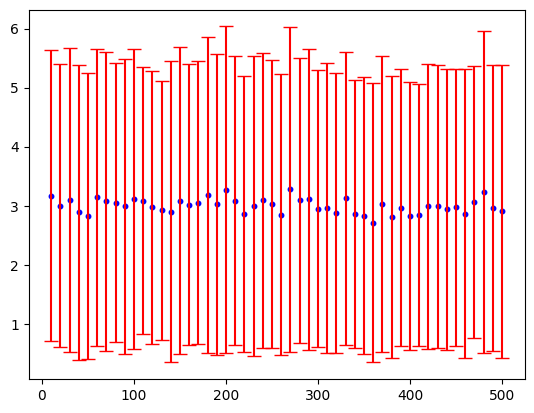

In [ ]:
#EdgeBiasCompensation plus subinterval sprinkling
#chisquare test

import math
import numpy as np
import matplotlib.pyplot as plt
from array import array
from numpy.random import default_rng
import timeit
import csv
import pandas as pd
import scipy.stats as stats
from scipy.stats import chisquare
from array import array
start = timeit.default_timer()
# Parameters
# Parameters
#Variables
start_ExpVal=0
end_ExpVal=500
EV_step=10
NoS=500
a = 100 # upper bound
b = 0 # lower bound
cycles=np.floor((end_ExpVal-start_ExpVal)/EV_step+1).astype(int)
running_ExpVal=np.zeros(cycles)
for i in range(cycles):
  running_ExpVal[i]=start_ExpVal+i*EV_step
running_ExpVal=running_ExpVal.astype(int)
memory=np.zeros(shape=(cycles,NoS))
finalchi=np.zeros(cycles)
stnd_dev=np.zeros(cycles)
variance=np.zeros(cycles)
n_2d=np.zeros(shape=(cycles, NoS))


def chival(target_a, target_b, target_c, graph_points): # function which returns a set of sprinkled points with edge-points eliminated
  chistat = []
  for f in range(NoS):
    extra=0
    fcoordy = (b-a)* np.random.random_sample((n[f],))+a # generate random y
    fcoordx = (b-a)* np.random.random_sample((n[f],))+a # generate random x
    new_n=0   # the new number of points
    for i in range(n[f]):
          if (fcoordy[i] >target_a and fcoordy[i]<target_b and fcoordx[i] >target_a and fcoordx[i]<target_b):
            new_n= new_n+1   # extract new number of points
    while new_n < n[f]:
      fcoordy = np.hstack((fcoordy, [(b-a)* np.random.random_sample()+a]))
      fcoordx = np.hstack((fcoordx, [(b-a)* np.random.random_sample()+a]))
      if (fcoordy[n[f]+extra] >target_a and fcoordy[n[f]+extra]<target_b and fcoordx[n[f]+extra] >target_a and fcoordx[n[f]+extra]<target_b):
        new_n +=1   # extra points to fill smaller box
      extra += 1 # how many additional points are added
    coord1x=np.zeros(n[f])   # generate empty x
    coord1y=np.zeros(n[f])   # generate empty y
    coord2x=np.zeros(n[f])   # generate empty x
    coord2y=np.zeros(n[f])   # generate empty y
    coord3x=np.zeros(n[f])   # generate empty x
    coord3y=np.zeros(n[f])   # generate empty y
    coord4x=np.zeros(n[f])   # generate empty x
    coord4y=np.zeros(n[f])   # generate empty y
    coordx=np.zeros(n[f])   # generate empty x
    coordy=np.zeros(n[f])   # generate empty y

    count=0
    # for i in range(n[f]+extra):
    #   # plt.plot(fcoordx[i],fcoordy[i],'ro')

    for i in range(n[f]+extra):
      if (fcoordy[i] >=target_a and fcoordy[i]<=target_c and fcoordx[i] >=target_a and fcoordx[i]<=target_c):
        coord1y[count]=fcoordy[i]   # copy valid x
        coord1x[count]=fcoordx[i]   # copy valid y
        count=count+1
      elif (fcoordy[i] >=target_c and fcoordy[i]<=target_b and fcoordx[i] >=target_c and fcoordx[i]<=target_b):
        coord2y[count]=fcoordy[i]   # copy valid x
        coord2x[count]=fcoordx[i]   # copy valid y
        count=count + 1
      elif (fcoordy[i] >=target_c and fcoordy[i]<=target_b and fcoordx[i] >=target_a and fcoordx[i]<=target_c):
        coord3y[count]=fcoordy[i]   # copy valid x
        coord3x[count]=fcoordx[i]   # copy valid y
        count =count + 1
      elif (fcoordy[i] >=target_a and fcoordy[i]<=target_c and fcoordx[i] >=target_c and fcoordx[i]<=target_b):
        coord4y[count]=fcoordy[i]   # copy valid x
        coord4x[count]=fcoordx[i]   # copy valid y
        count =count + 1

    coordx=coord1x+coord2x+coord3x+coord4x
    coordy=coord1y+coord2y+coord3y+coord4y
    index = np.argsort(coordx) # declare index array
    arra=0
    arrb=0
    arrc=0
    arrd=0
    for i in range(n[f]):
      if (coord1x[index[i]] !=0):
        arr=np.array(coord1x[index[i]])
        arra += 1
        # plt.plot(coord1x[index[i]],coord1y[index[i]],'bo')
        # plt.text(coord1x[index[i]],coord1y[index[i]], i+1)
      if (coord2x[index[i]] !=0):
        # plt.plot(coord2x[index[i]],coord2y[index[i]],'mo')
        # plt.text(coord2x[index[i]],coord2y[index[i]], i+1)
        arrb += 1
      if (coord3x[index[i]] !=0):
        # plt.plot(coord3x[index[i]],coord3y[index[i]],'yo')
        # plt.text(coord3x[index[i]],coord3y[index[i]], i+1)
        arrc += 1
      if (coord4x[index[i]] !=0):
        # plt.plot(coord4x[index[i]],coord4y[index[i]],'go')
        # plt.text(coord4x[index[i]],coord4y[index[i]], i+1)
        arrd += 1
    f_obs=arra,arrb,arrc,arrd
    f_obs=np.array(f_obs)
    # print(f_obs)
    stat=chisquare(f_obs)
    stat = np.array(stat)
    # print(stat)
    stat=np.array(stat)
    chistat=np.append(chistat,stat[0])
    # plt.gca().set_aspect('equal', adjustable='box')
    # plt.show()
  return coordx, coordy, index,chistat   # returns x and y coordinates of all valid points & index array & new count
for cy in range(cycles):
  avg=0
  rng = np.random.default_rng()
  n_2d[cy] = rng.poisson(running_ExpVal[cy], NoS)
  n=np.zeros(NoS)
  n=n_2d[cy].astype(int)
  #print(n)
  #print(cy)
  coordx, coordy, index,chistat= chival(0, 100, 50, 0)   # call Edge Bias Compensation function, save data
  #print(chistat)
  chistat = np.array(chistat)
  finalchi[cy] = np.average(chistat)
  stnd_dev[cy]=np.std(chistat)
  variance[cy]=np.var(chistat)
print(finalchi)
for i in range(cycles):
  #if(sd_memory[3][i] !=0):
  plt.scatter(running_ExpVal[i], finalchi[i], linewidths=2, c='b', s=5)
  plt.errorbar(running_ExpVal[i], finalchi[i], yerr=stnd_dev[i], fmt=' ', ecolor='r', capsize=5)
  list0 =[" "," "]
  for q in range(np.max(n)):
    list0.append(q)
  list1 = ["Information:", "N"]
  list1.extend(running_ExpVal)
  list2=["Final ExpVal= %d" %(end_ExpVal),"Chistat"]
  list2.extend(finalchi)
  list3=["NoS= %d" %(NoS), "Standard_Dev"]
  list3.extend(stnd_dev)
  list4=["Chisquare calculation", "Variance"]
  list4.extend(variance)
  rows = list(zip(list0, list1, list2, list3, list4))

  wtr = csv.writer(open ('EBC_CHISTAT_FIT_%d_%d.csv'%(end_ExpVal, NoS), 'w'), delimiter=',', lineterminator='\n')

  for row in rows :
      wtr.writerow (row)
plt.plot()
stop = timeit.default_timer()
print('Time: ', stop - start)


Type of fcoordx:   <class 'numpy.ndarray'>

fcoordx:   [8.68108057e+01 6.93735053e+01 1.36628125e+01 1.85778131e+01
 9.38048361e+01 6.86355697e+01 7.95325487e+01 2.73373452e+01
 8.52788098e+01 3.13913796e+01 1.23690966e+01 4.81659430e+01
 3.27162290e+01 7.21887732e+01 3.05912708e+01 9.11038196e+01
 9.68368995e+01 6.99324040e+01 2.31836920e+01 1.29620134e+01
 4.47746484e+01 9.46394797e+01 2.41886058e+00 8.26945431e+00
 6.78704488e+01 3.58887058e+01 6.08182108e+01 8.18971311e+01
 9.62067418e+01 2.21652161e+01 3.87694701e+01 2.57044223e+01
 7.69521446e+01 3.49857698e+01 5.16168130e+01 4.29275899e+01
 8.20385981e+01 7.18416668e+01 5.38257193e+01 7.06470093e+01
 7.30688008e+01 2.44806574e+01 3.87495695e+00 5.84135349e+01
 3.99497661e+01 6.91219803e+01 1.50701281e+01 4.53918858e+01
 5.71112529e+01 5.40325558e+01 6.82906679e+01 8.18888653e+01
 1.81592458e+01 4.32313894e+01 3.23260221e+01 2.64618099e+01
 3.48469786e+01 8.58207173e-01 5.23381987e+01 5.34540576e+01
 3.08837533e+01 9.24482380e+0

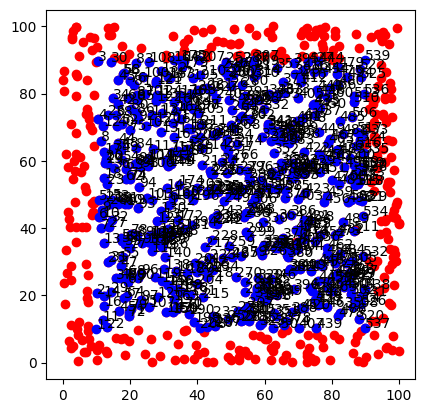

6312349.0
[2.40370371e+03 1.91049553e+03 1.66678735e+03 1.50607918e+03
 1.38678767e+03 1.29229616e+03 1.21430465e+03 1.14807504e+03
 1.09064901e+03 1.04005631e+03 9.94919165e+02 9.54236566e+02
 9.17258513e+02 8.83408664e+02 8.52234640e+02 8.23374901e+02
 7.96535996e+02 7.71476503e+02 7.47995441e+02 7.25923735e+02
 7.05117819e+02 6.85454761e+02 6.66828498e+02 6.49146900e+02
 6.32329432e+02 6.16305298e+02 6.01011933e+02 5.86393781e+02
 5.72401291e+02 5.58990082e+02 5.46120252e+02 5.33755798e+02
 5.21864127e+02 5.10415637e+02 4.99383368e+02 4.88742697e+02
 4.78471072e+02 4.68547796e+02 4.58953823e+02 4.49671591e+02
 4.40684872e+02 4.31978640e+02 4.23538959e+02 4.15352878e+02
 4.07408339e+02 3.99694104e+02 3.92199675e+02 3.84915237e+02
 3.77831597e+02 3.70940134e+02 3.64232752e+02 3.57701841e+02
 3.51340236e+02 3.45141186e+02 3.39098320e+02 3.33205623e+02
 3.27457406e+02 3.21848286e+02 3.16373166e+02 3.11027210e+02
 3.05805830e+02 3.00704668e+02 2.95719583e+02 2.90846633e+02
 2.86082066e+0

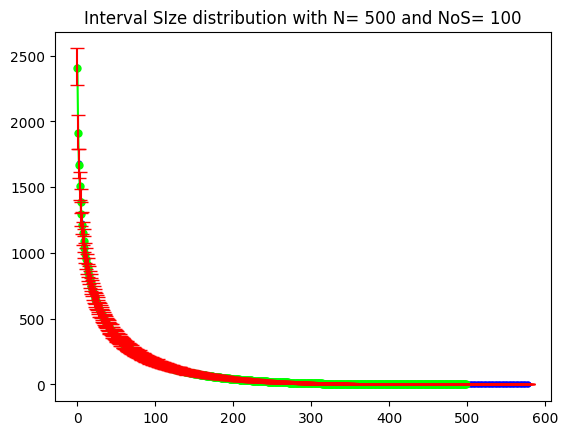

Time:  1837.202638455


In [ ]:
#FINAL
#Interval Size Distribution.
#Endpoint: EXCLUDED
#X-axis: Interval Size | Y-axis: avg Interval Size distribution over NoS number of sprinklings, with SD over average Interval Size distribution per sprinkling
# It uses Eq. 20 (specialized to 2D) from Glaser and Surya, Phys Rev D 2013
import math
import numpy as np
import matplotlib.pyplot as plt
from array import array
from numpy.random import default_rng
import timeit
import csv
import pandas as pd
from array import array
from mpmath import mp
start = timeit.default_timer()

#Variables
ExpVal=500
N=ExpVal
NoS=100
a = 100 # upper bound
b = 0 # lower bound
rng = np.random.default_rng()
n= rng.poisson(ExpVal, NoS)
n+=2
memory=np.zeros(shape=(NoS,np.max(n)))
counter=np.zeros(NoS)
average=np.zeros(ExpVal)
sub_int = np.zeros(N-1)  # sub_int(i) = <n_i>

def longest_path_matrix(R, dmax=None):
    N = n[f]
    if dmax is None:
        dmax = N
    LP = np.zeros((N, N))
    i = 1
    B = R
    while np.sum(B) > 0.:
        path_exist = np.sign(B)
        path_length = i * path_exist
        LP = np.maximum.reduce((LP, path_length))
        B = np.dot(B, R)
        i += 1
        if i == dmax:
            return LP
    return LP

def edge_bias_compensation(target_a, target_b, graph_points): # function which returns a set of sprinkled points with edge-points eliminated
  extra=0
  fcoordy = (b-a)* np.random.random_sample((n[f],))+a # generate random y
  fcoordx = (b-a)* np.random.random_sample((n[f],))+a # generate random x
  new_n=0   # the new number of points
  for i in range(n[f]):
        if (fcoordy[i] >target_a and fcoordy[i]<target_b and fcoordx[i] >target_a and fcoordx[i]<target_b):
          new_n= new_n+1   # extract new number of points
  while new_n < n[f]:
    fcoordy = np.hstack((fcoordy, [(b-a)* np.random.random_sample()+a]))
    fcoordx = np.hstack((fcoordx, [(b-a)* np.random.random_sample()+a]))
    if (fcoordy[n[f]+extra] >target_a and fcoordy[n[f]+extra]<target_b and fcoordx[n[f]+extra] >target_a and fcoordx[n[f]+extra]<target_b):
      new_n +=1   # extra points to fill smaller box
    extra += 1 # how many additional points are added

  coordx=np.zeros(n[f])   # generate empty x
  coordy=np.zeros(n[f])   # generate empty y
  count=0
  if(rep== 0 and graph_points!= 0):  # plotting colored causal diamond for visualizing the Edge Bias Compensation (RED - Rejected Points)
    for i in range(n[f]+extra):
      plt.plot(fcoordx[i],fcoordy[i],'ro')
  for i in range(n[f]+extra):
    if (fcoordy[i] >target_a and fcoordy[i]<target_b and fcoordx[i] >target_a and fcoordx[i]<target_b):
      coordy[count]=fcoordy[i]   # copy valid x
      coordx[count]=fcoordx[i]   # copy valid y
      count =count + 1
  coordy[0]=target_a
  coordx[0]=target_a
  coordy[1]=target_b
  coordx[1]=target_b
  if(rep== 0 and graph_points!=0):
    print("\nType of fcoordx:  ", type(fcoordx))
    print("\nfcoordx:  ", fcoordx)
    print("\nLength fcoordx:  ", len(fcoordx))
    print("\ncoordx:  ", coordx)
    print("\nLength coordx:  ", len(coordx))
    print(new_n/(n[f]+extra))  # display ratio of valid points
    print("\nNo. of points in box:", new_n) # display new count
    print("\nNo. of total points", n[f]+extra)
    if(n[f]==new_n):
      print("\nYES")
    else:
      print("\nNO")
  index = np.argsort(coordx) # declare index array
  if(rep== 0 and graph_points!=0):   # plotting colored causal diamond for visualizing the Edge Bias Compensation (BLUE - Valid points)
    for i in range(n[f]):
      plt.plot(coordx[index[i]],coordy[index[i]],'bo')
      plt.text(coordx[index[i]],coordy[index[i]], i+1)
      u=(coordx[index[i]],coordy[index[i]])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
  return coordx, coordy, index, n[f]   # returns x and y coordinates of all valid points & index array & new count

for f in range(NoS):
  # Random coordinates [b,a) uniform distribute
  rep=f
  coordx, coordy, index, n[f]= edge_bias_compensation(10, 90, 1)   # call Edge Bias Compensation function, save data
  R = [[0 for x in range(n[f])] for y in range(n[f])]
  L = [[0 for x in range(n[f])] for y in range(n[f])]


#    print(index)

    # Calculate Relation Matrix
  for i in range(n[f]):
    for j in range (n[f]):
      R[i][j]=0
      if (coordx[index[i]] > coordx[index[j]] and coordy[index[i]] > coordy[index[j]]):
        R[i][j]=1
      if (coordx[index[j]] > coordx[index[i]] and coordy[index[j]] > coordy[index[i]]):
        R[i][j]=1

  # Calculate Link Matrix
  for i in range(n[f]):
    for j in range (n[f]):
      L[i][j]=0
      if(R[i][j]==0):
        L[i][j]==0
      elif(i>j):
        L[i][j]=1
        for point in range (min(i,j)+1, max(i,j)):
          if(R[i][point]==1 and R[point][j]==1):
            L[i][j]=0

    #Calculate avg and proper time longest path length
  _LP=longest_path_matrix(R, dmax=None)
  _LP_int=_LP.astype(int)
  proper_time=0
  if(f==-1):
#Print LP
    print("  Longest Path :")
    for i in range(n[f]):
      for j in range (n[f]):
        print(" ", _LP[i][j], end= '' )
      print()

# Print relation Matrix
    print("  Relation Matrix :")
    for i in range(n[f]):
        for j in range (n[f]):
            print(" ", R[i][j], end= '' )
        print()

# Print link Matrix
    print("  Link Matrix :")
    for i in range(n[f]):
        for j in range (n[f]):
            print(" ", L[i][j], end= '' )
        print()

  for i in range(n[f]):
    for j in range(i+1, n[f]):
      # if(L[i][j]):
      #   memory[f][0]+=1
      if(R[i][j]):
        active_count=0
        counter[f] +=1
        for point in range(i+1,j):
          if (coordy[index[point]]>coordy[index[i]] and coordy[index[point]]<coordy[index[j]]):
            active_count +=1
        memory[f][active_count] +=1
sum_count=np.sum(counter)
print(sum_count)
average=np.sum(memory, axis=0)/NoS
#print(memory[27])
#print(average)
#print(sum(memory[27]))

stnd_dev=np.std(memory, axis=0)
variance=np.var(memory, axis=0)

# determines <n_i> for sub-intervals of EXCLUSIVE size i
for i in range (0,N-1):
  f1 = N**(i+2) / mp.factorial(i+2)
  f2 = 1 / (i+2)
  f3 = 1 / (i+1)
  sub_int[i] = f1*f2*f3*mp.hyp2f2(i+1,i+1,i+3,i+3,-N)  #sub_int(i) = <n_i>
print(sub_int)
plotted_x = []
plotted_y = []
for i in range(len(sub_int)):
  plotted_x.append(i)
  plotted_y.append(sub_int[i])
plt.plot(plotted_x, plotted_y, marker='o', linestyle='-', color='lime', markersize='5')
plt.title('Interval SIze distribution with N= %d and NoS= %d'%(N, NoS))

yexp = plotted_y
chistat=[]
for i in range(len(yexp)):
  chistat=np.append(chistat,(((average[i]-yexp[i])**2)/yexp[i]))
chistat=np.sum(chistat)
print("chistat", chistat) #chisquare value comparing values to analytical expression

for i in range(np.max(n)):
  #if(sd_memory[3][i] !=0):
  plt.scatter(i, average[i], linewidths=2, c='b', s=5)
  plt.errorbar(i, average[i], yerr=stnd_dev[i], fmt=' ', ecolor='r', capsize=5)
  #plt.yscale('log')
  list1 = ["Information:", "Interval Size"]
  for q in range(np.max(n)):
    list1.append(q)
  list2=["ExpVal= %d" %(ExpVal),"IS freq distribution"]
  list2.extend(average)
  list3=["NoS= %d" %(NoS), "Standard_Dev"]
  list3.extend(stnd_dev)
  list4=["Endpoints Excluded", "Variance"]
  list4.extend(variance)
  list5=["chistat=%.4f"%(chistat), "Analytical Estimation"]
  list5.extend(sub_int)
  rows = list(zip(list1, list2, list5, list3, list4))

  wtr = csv.writer(open ('EBC_ISD_NEW_EP_excluded_%d_%d.csv'%(ExpVal, NoS), 'w'), delimiter=',', lineterminator='\n')

  for row in rows :
      wtr.writerow (row)

plt.show()

stop = timeit.default_timer()
print('Time: ', stop - start)


Type of fcoordx:   <class 'numpy.ndarray'>

fcoordx:   [7.54243773e+01 2.27563082e+01 8.77308792e+01 9.66196784e+01
 9.81265657e+01 6.13084549e+01 8.62702975e+01 4.08924723e+01
 9.03052014e+01 5.40084137e+01 4.15700865e+00 3.20812339e+01
 8.63140650e+00 6.88139275e+01 8.53036307e+01 7.11130706e+01
 5.16015216e+01 7.50456180e+01 3.94509723e+01 4.41987052e+01
 4.88419621e+01 1.19535900e+01 9.46642374e+01 8.08650200e+00
 6.69858180e+01 1.74891919e+01 3.64841593e+01 8.64593378e+01
 3.87192904e+01 3.20104910e+01 8.98266608e+01 2.94255801e+00
 2.93301231e+01 5.81040716e+01 6.90567979e+00 2.87422950e+01
 7.92710927e+01 4.28147327e+01 8.11760879e+01 6.22406905e+01
 3.31909615e+00 9.10644072e+01 6.20946478e+00 6.71574557e+01
 8.91539734e+01 4.14628631e+01 4.89881583e+01 7.90615166e+01
 3.22417765e+01 9.42306388e+01 4.80178587e+01 3.92028275e+01
 4.30435582e-02 8.48454173e+01 7.20456445e+01 6.71714759e+01
 1.17495413e+01 7.60119813e+00 4.63321590e+01 2.68469459e+01
 6.24781502e+01 7.76748803e+0

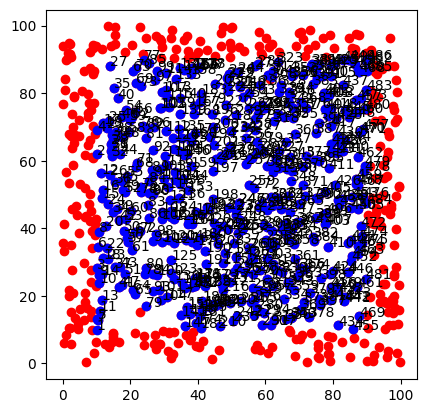

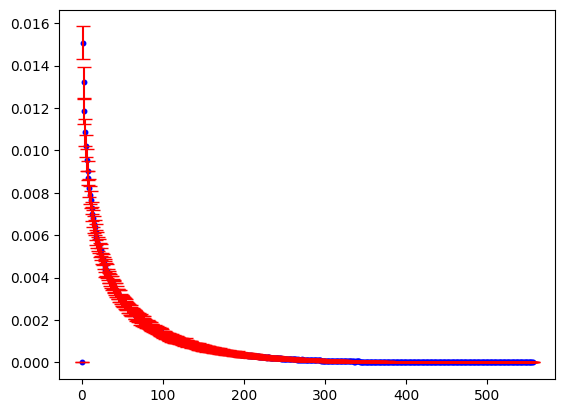

Time:  1065.2103209269999


In [ ]:
#@title
#Interval Size Distribution.
#Endpoint: INCLUDED
#X-axis: Interval Size | Y-axis: avg Interval Size distribution over NoS number of sprinklings, with SD over avearge Interval Size distribution per sprinkling
import math
import numpy as np
import matplotlib.pyplot as plt
from array import array
from numpy.random import default_rng
import timeit
import csv
import pandas as pd
from array import array
start = timeit.default_timer()

#Variables
ExpVal=500
NoS=50
a = 100 # upper bound
b = 0 # lower bound
rng = np.random.default_rng()
n= rng.poisson(ExpVal, NoS)
memory=np.zeros(shape=(NoS,np.max(n)))
counter=np.zeros(NoS)
average=np.zeros(ExpVal)

def longest_path_matrix(R, dmax=None):
    N = n[f]
    if dmax is None:
        dmax = N
    LP = np.zeros((N, N))
    i = 1
    B = R
    while np.sum(B) > 0.:
        path_exist = np.sign(B)
        path_length = i * path_exist
        LP = np.maximum.reduce((LP, path_length))
        B = np.dot(B, R)
        i += 1
        if i == dmax:
            return LP
    return LP

def edge_bias_compensation(target_a, target_b, graph_points): # function which returns a set of sprinkled points with edge-points eliminated
  extra=0
  fcoordy = (b-a)* np.random.random_sample((n[f],))+a # generate random y
  fcoordx = (b-a)* np.random.random_sample((n[f],))+a # generate random x
  new_n=0   # the new number of points
  for i in range(n[f]):
        if (fcoordy[i] >target_a and fcoordy[i]<target_b and fcoordx[i] >target_a and fcoordx[i]<target_b):
          new_n= new_n+1   # extract new number of points
  while new_n < n[f]:
    fcoordy = np.hstack((fcoordy, [(b-a)* np.random.random_sample()+a]))
    fcoordx = np.hstack((fcoordx, [(b-a)* np.random.random_sample()+a]))
    if (fcoordy[n[f]+extra] >target_a and fcoordy[n[f]+extra]<target_b and fcoordx[n[f]+extra] >target_a and fcoordx[n[f]+extra]<target_b):
      new_n +=1   # extra points to fill smaller box
    extra += 1 # how many additional points are added

  coordx=np.zeros(n[f])   # generate empty x
  coordy=np.zeros(n[f])   # generate empty y
  count=0
  if(rep== 0 and graph_points!= 0):  # plotting colored causal diamond for visualizing the Edge Bias Compensation (RED - Rejected Points)
    for i in range(n[f]+extra):
      plt.plot(fcoordx[i],fcoordy[i],'ro')
  for i in range(n[f]+extra):
    if (fcoordy[i] >target_a and fcoordy[i]<target_b and fcoordx[i] >target_a and fcoordx[i]<target_b):
      coordy[count]=fcoordy[i]   # copy valid x
      coordx[count]=fcoordx[i]   # copy valid y
      count =count + 1
  coordy[0]=target_a
  coordx[0]=target_a
  coordy[1]=target_b
  coordx[1]=target_b
  if(rep== 0 and graph_points!=0):
    print("\nType of fcoordx:  ", type(fcoordx))
    print("\nfcoordx:  ", fcoordx)
    print("\nLength fcoordx:  ", len(fcoordx))
    print("\ncoordx:  ", coordx)
    print("\nLength coordx:  ", len(coordx))
    print(new_n/(n[f]+extra))  # display ratio of valid points
    print("\nNo. of points in box:", new_n) # display new count
    print("\nNo. of total points", n[f]+extra)
    if(n[f]==new_n):
      print("\nYES")
    else:
      print("\nNO")
  index = np.argsort(coordx) # declare index array
  if(rep== 0 and graph_points!=0):   # plotting colored causal diamond for visualizing the Edge Bias Compensation (BLUE - Valid points)
    for i in range(n[f]):
      plt.plot(coordx[index[i]],coordy[index[i]],'bo')
      plt.text(coordx[index[i]],coordy[index[i]], i+1)
      u=(coordx[index[i]],coordy[index[i]])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
  return coordx, coordy, index, n[f]   # returns x and y coordinates of all valid points & index array & new count

for f in range(NoS):
  # Random coordinates [b,a) uniform distribute
  rep=f
  coordx, coordy, index, n[f]= edge_bias_compensation(10, 90, 1)   # call Edge Bias Compensation function, save data
  R = [[0 for x in range(n[f])] for y in range(n[f])]
  L = [[0 for x in range(n[f])] for y in range(n[f])]

    # Calculate Relation Matrix
  for i in range(n[f]):
    for j in range (n[f]):
      R[i][j]=0
      if (coordx[index[i]] > coordx[index[j]] and coordy[index[i]] > coordy[index[j]]):
        R[i][j]=1

  # Calculate Link Matrix
  for i in range(n[f]):
    for j in range (n[f]):
      L[i][j]=0
      if(R[i][j]==0):
        L[i][j]==0
      elif(i>j):
        L[i][j]=1
        for point in range (min(i,j)+1, max(i,j)):
          if(R[i][point]==1 and R[point][j]==1):
            L[i][j]=0

    #Calculate avg and proper time longest path length
  _LP=longest_path_matrix(R, dmax=None)
  _LP_int=_LP.astype(int)
  proper_time=0
  for i in range(n[f]):
    for j in range(n[f]):
      if(_LP_int[i][j] != 0):
        active_count=0
        counter[f] +=1
        for point in range(index[j]+1, index[i]):
          if (coordy[index[point]]>coordy[index[j]] and coordy[index[point]]<coordy[index[i]]):
            active_count +=1
        if(active_count >0):
          memory[f][active_count] +=1

sum_count=np.sum(counter)
average=np.sum(memory, axis=0)/sum_count
for f in range(NoS):
  memory[f]=memory[f]/counter[f]

#print(memory[27])
#print(average)
#print(sum(memory[27]))

stnd_dev=np.std(memory, axis=0)
variance=np.var(memory, axis=0)

for i in range(np.max(n)):
  #if(sd_memory[3][i] !=0):
  plt.scatter(i, average[i], linewidths=2, c='b', s=5)
  plt.errorbar(i, average[i], yerr=stnd_dev[i], fmt=' ', ecolor='r', capsize=5)
 # plt.yscale('log')
  list1 = ["Information:", "Interval Size"]
  for q in range(np.max(n)):
    list1.append(q)
  list2=["ExpVal= %d" %(ExpVal),"IS freq distribution"]
  list2.extend(average)
  list3=["NoS= %d" %(NoS), "Standard_Dev"]
  list3.extend(stnd_dev)
  list4=["Endpoints Excluded", "Variance"]
  list4.extend(variance)
  rows = list(zip(list1, list2, list3, list4))

  wtr = csv.writer(open ('EBC_ISD_EP_included_%d_%d.csv'%(ExpVal, NoS), 'w'), delimiter=',', lineterminator='\n')

  for row in rows :
      wtr.writerow (row)

plt.show()

stop = timeit.default_timer()
print('Time: ', stop - start)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]
[29 21 30 29 21 21 31 30 21 23 22 28 28 29 31 30 33 31 21 33 27 30 28 20
 24 30 27 24 32 35 25 33 20 27 34 24 26 20 38 31 26 22 22 27 24 18 27 36
 33 24]
[51 77 51 58 45 58 53 53 47 44 68 46 51 55 62 49 50 55 52 62 50 60 66 50
 57 61 54 56 50 54 60 48 45 48 41 45 60 64 55 51 54 47 57 54 45 45 53 46
 45 47]
[88 95 79 57 80 78 78 67 76 74 88 61 85 79 85 67 66 75 76 72 82 76 88 71
 70 88 78 93 77 91 78 71 68 85 79 61 68 68 79 75 80 70 78 79 85 83 92 71
 85 77]
[104 117  96  97  91 107  92 102 124 103  89 107  98  97 129 113  91 112
 112  79 103  90  93  96 119 109  91 106  96 113 108 112 105  95 101  98
 109 107  94  95 113  98  96 109 108 106 115  79 103  96]
[135 126 123 132 139 122 127 120 129 134 118 115 137 132 118 132 120 137
 134 124 120 135 126 128 124 137 129 119 131 133 116 133 120 108 133 151
 121 127 134 142 115 111 141 123 144 139 121 103 131 134]
[173 153 174 169 158 162 16

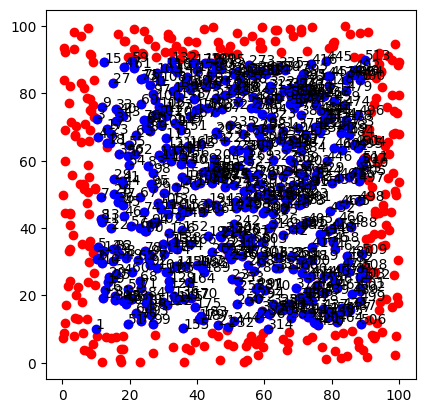

[12. 18. 13. 12. 14. 11. 12. 12. 12. 12. 15. 11. 13. 13. 12. 11. 10. 14.
 14. 14. 12. 14. 15. 14. 13. 11. 13. 11. 10. 13. 14.  9. 10. 12. 14. 10.
 13. 15. 13. 16. 18. 13. 12. 13. 11.  9. 10. 13. 10. 12.]
12.56
628.0
[ 8.62 12.56 15.28 18.02 19.54 22.22 24.02 25.6  26.9  27.78 30.2  31.08
 33.16 34.   35.68 36.84 37.5  39.04 40.   40.32] [ 8.2335063  12.04140874 14.99567162 17.50180065 19.71915557 21.73018537
 23.58417586 25.3133948  26.94034316 28.48145722 29.94917973 31.35320091
 32.70124342 33.99958076 35.2533921  36.4670126  37.64411451 38.78784118
 39.90090807 40.98568019]
0.1356579208072815


<ipython-input-5-c172650da809>:154: RuntimeWarning: divide by zero encountered in power
  f=2- 0.79*x**(-0.25)
<ipython-input-5-c172650da809>:155: RuntimeWarning: invalid value encountered in multiply
  y=np.sqrt(x)*f
<ipython-input-5-c172650da809>:158: RuntimeWarning: divide by zero encountered in power
  fnew=2-0.79*running_ExpVal**(-0.25)
<ipython-input-5-c172650da809>:160: RuntimeWarning: invalid value encountered in multiply
  yexp=yexp*fnew
<ipython-input-5-c172650da809>:180: RuntimeWarning: divide by zero encountered in power
  analytical_val[i]=(2- 0.79*x**(-0.25))*np.sqrt(x)
<ipython-input-5-c172650da809>:180: RuntimeWarning: invalid value encountered in double_scalars
  analytical_val[i]=(2- 0.79*x**(-0.25))*np.sqrt(x)


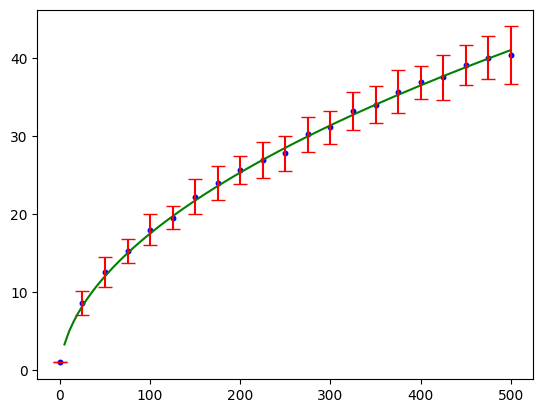

Time:  3390.869198586999


In [ ]:
#Longest Path length Distribution
#Endpoints: EXCLUDED
#X-axis: ExpVal | Y-axis: avg ProperTime(Longest Path Length) over NoS nmuber of sprinklings
import math
import numpy as np
import matplotlib.pyplot as plt
from array import array
from numpy.random import default_rng
import timeit
import csv
import pandas as pd
from array import array
start = timeit.default_timer()

#Variables
start_ExpVal=0
end_ExpVal=500
EV_step=25
NoS=50
a = 100 # upper bound
b = 0 # lower bound
cycles=np.floor((end_ExpVal-start_ExpVal)/EV_step+1).astype(int)
running_ExpVal=np.zeros(cycles)
for i in range(cycles):
  running_ExpVal[i]=start_ExpVal+i*EV_step
running_ExpVal=running_ExpVal.astype(int)
memory=np.zeros(shape=(cycles,NoS))
average=np.zeros(cycles)
n_2d=np.zeros(shape=(cycles, NoS))
def longest_path_matrix(R, dmax=None):
    N = n[f]
    if dmax is None:
        dmax = N
    LP = np.zeros((N, N))
    i = 1
    B = R
    while np.sum(B) > 0.:
        path_exist = np.sign(B)
        path_length = i * path_exist
        LP = np.maximum.reduce((LP, path_length))
        B = np.dot(B, R)
        i += 1
        if i == dmax:
            return LP
    return LP

def edge_bias_compensation(target_a, target_b, graph_points): # function which returns a set of sprinkled points with edge-points eliminated
  extra=0
  fcoordy = (b-a)* np.random.random_sample((n[f],))+a # generate random y
  fcoordx = (b-a)* np.random.random_sample((n[f],))+a # generate random x
  new_n=0   # the new number of points
  for i in range(n[f]):
        if (fcoordy[i] >target_a and fcoordy[i]<target_b and fcoordx[i] >target_a and fcoordx[i]<target_b):
          new_n= new_n+1   # extract new number of points
  while new_n < n[f]:
    fcoordy = np.hstack((fcoordy, [(b-a)* np.random.random_sample()+a]))
    fcoordx = np.hstack((fcoordx, [(b-a)* np.random.random_sample()+a]))
    if (fcoordy[n[f]+extra] >target_a and fcoordy[n[f]+extra]<target_b and fcoordx[n[f]+extra] >target_a and fcoordx[n[f]+extra]<target_b):
      new_n +=1   # extra points to fill smaller box
    extra += 1 # how many additional points are added

  coordx=np.zeros(n[f])   # generate empty x
  coordy=np.zeros(n[f])   # generate empty y
  count=0
  if(cy==cycles-1 and rep== 0 and graph_points!= 0):  # plotting colored causal diamond for visualizing the Edge Bias Compensation (RED - Rejected Points)
    for i in range(n[f]+extra):
      plt.plot(fcoordx[i],fcoordy[i],'ro')
  for i in range(n[f]+extra):
    if (fcoordy[i] >target_a and fcoordy[i]<target_b and fcoordx[i] >target_a and fcoordx[i]<target_b):
      coordy[count]=fcoordy[i]   # copy valid x
      coordx[count]=fcoordx[i]   # copy valid y
      count =count + 1
  if(np.max(n)>0):
    coordy[0]=target_a
    coordx[0]=target_a
    coordy[1]=target_b
    coordx[1]=target_b
  if(cy==cycles-1 and rep== 0 and graph_points!=0):
    print("\nType of fcoordx:  ", type(fcoordx))
    print("\nfcoordx:  ", fcoordx)
    print("\nLength fcoordx:  ", len(fcoordx))
    print("\ncoordx:  ", coordx)
    print("\nLength coordx:  ", len(coordx))
    print(new_n/(n[f]+extra))  # display ratio of valid points
    print("\nNo. of points in box:", new_n) # display new count
    print("\nNo. of total points", n[f]+extra)
    if(n[f]==new_n):
      print("\nYES")
    else:
      print("\nNO")
  index = np.argsort(coordx) # declare index array
  if(cy==cycles-1 and rep== 0 and graph_points!=0):   # plotting colored causal diamond for visualizing the Edge Bias Compensation (BLUE - Valid points)
    for i in range(n[f]):
      plt.plot(coordx[index[i]],coordy[index[i]],'bo')
      plt.text(coordx[index[i]],coordy[index[i]], i+1)
      u=(coordx[index[i]],coordy[index[i]])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
  return coordx, coordy, index, n[f]   # returns x and y coordinates of all valid points & index array & new count

for cy in range(cycles):
  avg=0
  rng = np.random.default_rng()
  n_2d[cy] = rng.poisson(running_ExpVal[cy], NoS)
  n_2d[cy]+=2
  n=np.zeros(NoS)
  n=n_2d[cy].astype(int)
  print(n)
  for f in range(NoS):
    rep=f
    coordx, coordy, index, n[f]= edge_bias_compensation(10, 90, 1)   # call Edge Bias Compensation function, save data
    R = [[0 for x in range(n[f])] for y in range(n[f])]
    L = [[0 for x in range(n[f])] for y in range(n[f])]

      # Calculate Relation Matrix
    for i in range(n[f]):
      for j in range (n[f]):
        R[i][j]=0
        if (coordx[index[i]] > coordx[index[j]] and coordy[index[i]] > coordy[index[j]]):
          R[i][j]=1

    # Calculate Link Matrix
    for i in range(n[f]):
      for j in range (n[f]):
        L[i][j]=0
        if(R[i][j]==0):
          L[i][j]==0
        elif(i>j):
          L[i][j]=1
          for point in range (min(i,j)+1, max(i,j)):
            if(R[i][point]==1 and R[point][j]==1):
              L[i][j]=0

      #Calculate avg and proper time longest path length
    _LP=longest_path_matrix(R, dmax=None)
    _LP_int=_LP.astype(int)
    proper_time=0
    for i in range(n[f]):
      for j in range(n[f]):
        if(_LP_int[i][j] > proper_time):
          proper_time=_LP_int[i][j]
    memory[cy][f] = proper_time
  average[cy]=sum(memory[cy])/NoS

print(memory[2])
print(average[2])
print(sum(memory[2]))

stnd_dev=np.std(memory, axis=1)
variance=np.var(memory, axis=1)


x=np.linspace(start_ExpVal, end_ExpVal, 100)
f=2- 0.79*x**(-0.25)
y=np.sqrt(x)*f
running_ExpVal=np.array(running_ExpVal)
# print(running_ExpVal)
fnew=2-0.79*running_ExpVal**(-0.25)
yexp=np.sqrt(running_ExpVal)
yexp=yexp*fnew
yexp=np.delete(yexp,0)
averagenew=np.delete(average,0)
print(averagenew,yexp)
# chistat=stats.chisquare(averagenew,yexp)
chistat=[]
for i in range(len(averagenew)):
  chistat=np.append(chistat,(((averagenew[i]-yexp[i])**2)/yexp[i]))
chistat=np.sum(chistat)
print(chistat) #chisquare value comparing values to analytical expression


#np.sqrt(x/5000)
#y=np.sqrt(np.pi)/(2*gamma(1/2))*x**2
plt.plot(x,y, 'g')


analytical_val=np.zeros(cycles)
for i in range(cycles):
  x=running_ExpVal[i]
  analytical_val[i]=(2- 0.79*x**(-0.25))*np.sqrt(x)
for i in range(cycles):
  #if(sd_memory[3][i] !=0):
  plt.scatter(running_ExpVal[i], average[i], linewidths=2, c='b', s=5)
  plt.errorbar(running_ExpVal[i], average[i], yerr=stnd_dev[i], fmt=' ', ecolor='r', capsize=5)
  list0 =["chistat=%.4f"%(chistat)," "]
  for q in range(np.max(n)):
    list0.append(q)
  list1 = ["Information: ", "Expected Value"]
  list1.extend(running_ExpVal)
  list2=["Final ExpVal= %d" %(end_ExpVal),"Longest Path Length"]
  list2.extend(average)
  list3=["NoS= %d" %(NoS), "Standard_Dev"]
  list3.extend(stnd_dev)
  list4=["Endpoints Excluded", "Variance"]
  list4.extend(variance)
  list5=["Initial ExpVal= %d" %(start_ExpVal), "Analytical Estimation"]
  list5.extend(analytical_val)
  rows = list(zip(list0, list1, list5, list2, list3, list4))

  wtr = csv.writer(open ('EBC_LPD_EP_excluded_%d_%d.csv'%(end_ExpVal, NoS), 'w'), delimiter=',', lineterminator='\n')
  for row in rows :
        wtr.writerow (row)
plt.show()
stop = timeit.default_timer()
print('Time: ', stop - start)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
DONE 0 / 11 @@@@@@@@@@@@@@@@@@@@
[40 43 48 45 54 41 43 37 47 53 44 43 47 48 56 47 49 49 43 46 63 61 63 51
 54 61 54 42 37 65 44 60 48 49 56 62 45 51 51 40 42 56 56 42 42 52 51 63
 41 54 58 50 53 60 38 60 59 42 50 40 39 47 45 47 44 50 39 57 46 46 56 50
 50 54 36 61 54 56 63 56 62 58 54 57 52 47 48 58 51 56 47 51 37 39 35 63
 44 68 48 44]
DONE 1 / 11 @@@@@@@@@@@@@@@@@@@@
[106  82  96 102 125 100 100  99  98 110 111  91  96 110  90  92 119 101
  97  98  85 114 128 101 109  90 103  92  74  91  91  96  98 100  98  89
 100  99  98  91 117  92 125 111  92 105  93  89 100 108  93  95 102 110
  91 110  85 109 111 108  95  99 102 103 117 114  87 100 107  92  98  78
  99 102  95  97  99  99  98 107 112  98 107 107 103 111 100  97  94  92
  99 113 108 108 109  98  94  98  92  96]
DONE 2 / 11 @@@@@

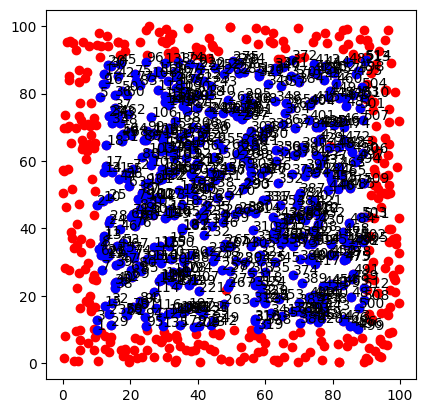

DONE 10 / 11 @@@@@@@@@@@@@@@@@@@@
[17. 13. 19. 19. 23. 15. 19. 17. 18. 21. 17. 18. 17. 17. 16. 16. 19. 17.
 19. 17. 13. 20. 22. 17. 21. 15. 17. 16. 17. 15. 17. 16. 19. 17. 16. 14.
 18. 20. 15. 17. 20. 17. 21. 20. 17. 20. 16. 17. 18. 19. 16. 18. 17. 20.
 17. 19. 15. 20. 20. 14. 17. 17. 18. 19. 22. 19. 17. 18. 18. 16. 20. 16.
 18. 20. 16. 18. 16. 18. 21. 18. 16. 19. 18. 17. 19. 16. 18. 18. 16. 15.
 16. 19. 21. 21. 21. 17. 17. 19. 18. 21.]
17.81
1781.0
[12.02 17.81 21.82 25.28 28.58 31.32 34.02 36.89 38.78 41.24] [12.04140874 17.50180065 21.73018537 25.3133948  28.48145722 31.35320091
 33.99958076 36.4670126  38.78784118 40.98568019]
0.012754936849986954


<ipython-input-1-68e8de93fd0c>:153: RuntimeWarning: divide by zero encountered in power
  f=2- 0.79*x**(-0.25)
<ipython-input-1-68e8de93fd0c>:154: RuntimeWarning: invalid value encountered in multiply
  y=np.sqrt(x)*f
<ipython-input-1-68e8de93fd0c>:157: RuntimeWarning: divide by zero encountered in power
  fnew=2-0.79*running_ExpVal**(-0.25)
<ipython-input-1-68e8de93fd0c>:159: RuntimeWarning: invalid value encountered in multiply
  yexp=yexp*fnew
<ipython-input-1-68e8de93fd0c>:179: RuntimeWarning: divide by zero encountered in power
  analytical_val[i]=(2- 0.79*x**(-0.25))*np.sqrt(x)
<ipython-input-1-68e8de93fd0c>:179: RuntimeWarning: invalid value encountered in double_scalars
  analytical_val[i]=(2- 0.79*x**(-0.25))*np.sqrt(x)


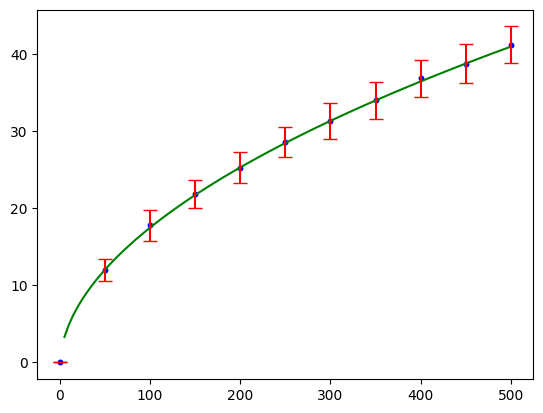

Time:  2117.896508949


In [ ]:
#Longest Path length Distribution
#Endpoints: INCLUDED
#X-axis: ExpVal | Y-axis: avg ProperTime(Longest Path Length) over NoS nmuber of sprinklings
import math
import numpy as np
import matplotlib.pyplot as plt
from array import array
from numpy.random import default_rng
import timeit
import csv
import pandas as pd
from array import array
start = timeit.default_timer()

#Variables
start_ExpVal=0
end_ExpVal=500
EV_step=50
NoS=100
a = 100 # upper bound
b = 0 # lower bound
cycles=np.floor((end_ExpVal-start_ExpVal)/EV_step+1).astype(int)
running_ExpVal=np.zeros(cycles)
for i in range(cycles):
  running_ExpVal[i]=start_ExpVal+i*EV_step
running_ExpVal=running_ExpVal.astype(int)
memory=np.zeros(shape=(cycles,NoS))
average=np.zeros(cycles)
n_2d=np.zeros(shape=(cycles, NoS))
def longest_path_matrix(R, dmax=None):
    N = n[f]
    if dmax is None:
        dmax = N
    LP = np.zeros((N, N))
    i = 1
    B = R
    while np.sum(B) > 0.:
        path_exist = np.sign(B)
        path_length = i * path_exist
        LP = np.maximum.reduce((LP, path_length))
        B = np.dot(B, R)
        i += 1
        if i == dmax:
            return LP
    return LP

def edge_bias_compensation(target_a, target_b, graph_points): # function which returns a set of sprinkled points with edge-points eliminated
  extra=0
  fcoordy = (b-a)* np.random.random_sample((n[f],))+a # generate random y
  fcoordx = (b-a)* np.random.random_sample((n[f],))+a # generate random x
  new_n=0   # the new number of points
  for i in range(n[f]):
        if (fcoordy[i] >target_a and fcoordy[i]<target_b and fcoordx[i] >target_a and fcoordx[i]<target_b):
          new_n= new_n+1   # extract new number of points
  while new_n < n[f]:
    fcoordy = np.hstack((fcoordy, [(b-a)* np.random.random_sample()+a]))
    fcoordx = np.hstack((fcoordx, [(b-a)* np.random.random_sample()+a]))
    if (fcoordy[n[f]+extra] >target_a and fcoordy[n[f]+extra]<target_b and fcoordx[n[f]+extra] >target_a and fcoordx[n[f]+extra]<target_b):
      new_n +=1   # extra points to fill smaller box
    extra += 1 # how many additional points are added

  coordx=np.zeros(n[f])   # generate empty x
  coordy=np.zeros(n[f])   # generate empty y
  count=0
  if(cy==cycles-1 and rep== 0 and graph_points!= 0):  # plotting colored causal diamond for visualizing the Edge Bias Compensation (RED - Rejected Points)
    for i in range(n[f]+extra):
      plt.plot(fcoordx[i],fcoordy[i],'ro')
  for i in range(n[f]+extra):
    if (fcoordy[i] >target_a and fcoordy[i]<target_b and fcoordx[i] >target_a and fcoordx[i]<target_b):
      coordy[count]=fcoordy[i]   # copy valid x
      coordx[count]=fcoordx[i]   # copy valid y
      count =count + 1
  if(np.max(n)>0):
    coordy[0]=target_a
    coordx[0]=target_a
    coordy[1]=target_b
    coordx[1]=target_b
  if(cy==cycles-1 and rep== 0 and graph_points!=0):
    print("\nType of fcoordx:  ", type(fcoordx))
    print("\nfcoordx:  ", fcoordx)
    print("\nLength fcoordx:  ", len(fcoordx))
    print("\ncoordx:  ", coordx)
    print("\nLength coordx:  ", len(coordx))
    print(new_n/(n[f]+extra))  # display ratio of valid points
    print("\nNo. of points in box:", new_n) # display new count
    print("\nNo. of total points", n[f]+extra)
    if(n[f]==new_n):
      print("\nYES")
    else:
      print("\nNO")
  index = np.argsort(coordx) # declare index array
  if(cy==cycles-1 and rep== 0 and graph_points!=0):   # plotting colored causal diamond for visualizing the Edge Bias Compensation (BLUE - Valid points)
    for i in range(n[f]):
      plt.plot(coordx[index[i]],coordy[index[i]],'bo')
      plt.text(coordx[index[i]],coordy[index[i]], i+1)
      u=(coordx[index[i]],coordy[index[i]])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
  return coordx, coordy, index, n[f]   # returns x and y coordinates of all valid points & index array & new count

for cy in range(cycles):
  avg=0
  rng = np.random.default_rng()
  n_2d[cy] = rng.poisson(running_ExpVal[cy], NoS)
  n=np.zeros(NoS)
  n=n_2d[cy].astype(int)
  print(n)
  for f in range(NoS):
    rep=f
    coordx, coordy, index, n[f]= edge_bias_compensation(10, 90, 1)   # call Edge Bias Compensation function, save data
    R = [[0 for x in range(n[f])] for y in range(n[f])]
    L = [[0 for x in range(n[f])] for y in range(n[f])]

      # Calculate Relation Matrix
    for i in range(n[f]):
      for j in range (n[f]):
        R[i][j]=0
        if (coordx[index[i]] > coordx[index[j]] and coordy[index[i]] > coordy[index[j]]):
          R[i][j]=1

    # Calculate Link Matrix
    for i in range(n[f]):
      for j in range (n[f]):
        L[i][j]=0
        if(R[i][j]==0):
          L[i][j]==0
        elif(i>j):
          L[i][j]=1
          for point in range (min(i,j)+1, max(i,j)):
            if(R[i][point]==1 and R[point][j]==1):
              L[i][j]=0

      #Calculate avg and proper time longest path length
    _LP=longest_path_matrix(R, dmax=None)
    _LP_int=_LP.astype(int)
    proper_time=0
    for i in range(n[f]):
      for j in range(n[f]):
        if(_LP_int[i][j] > proper_time):
          proper_time=_LP_int[i][j]
    memory[cy][f] = proper_time
  average[cy]=sum(memory[cy])/NoS
  print("DONE %d / %d @@@@@@@@@@@@@@@@@@@@"%(cy, cycles))
print(memory[2])
print(average[2])
print(sum(memory[2]))

stnd_dev=np.std(memory, axis=1)
variance=np.var(memory, axis=1)


x=np.linspace(start_ExpVal, end_ExpVal, 100)
f=2- 0.79*x**(-0.25)
y=np.sqrt(x)*f
running_ExpVal=np.array(running_ExpVal)
# print(running_ExpVal)
fnew=2-0.79*running_ExpVal**(-0.25)
yexp=np.sqrt(running_ExpVal)
yexp=yexp*fnew
yexp=np.delete(yexp,0)
averagenew=np.delete(average,0)
print(averagenew,yexp)
# chistat=stats.chisquare(averagenew,yexp)
chistat=[]
for i in range(len(averagenew)):
  chistat=np.append(chistat,(((averagenew[i]-yexp[i])**2)/yexp[i]))
chistat=np.sum(chistat)
print(chistat) #chisquare value comparing values to analytical expression


#np.sqrt(x/5000)
#y=np.sqrt(np.pi)/(2*gamma(1/2))*x**2
plt.plot(x,y, 'g')


analytical_val=np.zeros(cycles)
for i in range(cycles):
  x=running_ExpVal[i]
  analytical_val[i]=(2- 0.79*x**(-0.25))*np.sqrt(x)
for i in range(cycles):
  #if(sd_memory[3][i] !=0):
  plt.scatter(running_ExpVal[i], average[i], linewidths=2, c='b', s=5)
  plt.errorbar(running_ExpVal[i], average[i], yerr=stnd_dev[i], fmt=' ', ecolor='r', capsize=5)
  list0 =["chistat=%.4f"%(chistat)," "]
  for q in range(np.max(n)):
    list0.append(q)
  list1 = ["Information: ", "Expected Value"]
  list1.extend(running_ExpVal)
  list2=["Final ExpVal= %d" %(end_ExpVal),"Longest Path Length"]
  list2.extend(average)
  list3=["NoS= %d" %(NoS), "Standard_Dev"]
  list3.extend(stnd_dev)
  list4=["Endpoints Included", "Variance"]
  list4.extend(variance)
  list5=["Initial ExpVal= %d" %(start_ExpVal), "Analytical Estimation"]
  list5.extend(analytical_val)
  rows = list(zip(list0, list1, list5, list2, list3, list4))

  wtr = csv.writer(open ('EBC_LPD_EP_included_%d_%d.csv'%(end_ExpVal, NoS), 'w'), delimiter=',', lineterminator='\n')
  for row in rows :
        wtr.writerow (row)
plt.show()
stop = timeit.default_timer()
print('Time: ', stop - start)


Type of fcoordx:   <class 'numpy.ndarray'>

fcoordx:   [5.43801926e+01 6.57403951e+00 3.77004566e+01 3.54905875e+01
 2.66182262e+00 3.84270271e+01 9.60657998e+01 6.57252562e+01
 2.56787344e+01 3.58250531e+01 6.33587902e+01 7.20883353e+00
 7.05588020e+01 4.89092426e+01 4.58895780e+01 2.73849107e+01
 9.27268334e+01 3.30617098e+01 4.15333839e+01 9.69219447e+01
 7.50895015e+01 8.99587539e+01 2.61162454e+00 1.93700703e+01
 1.62215173e+01 1.41240022e+01 3.33668040e+01 8.44540231e+01
 5.87030507e+01 3.61711292e+01 9.12565138e+01 8.01831582e+01
 1.56773599e+01 2.75086996e+01 5.28590220e+01 9.67134013e+01
 2.88861723e+01 1.58515330e+01 8.86173159e+01 4.23916929e+01
 3.64927102e+01 1.01227469e+01 2.96024001e+01 8.14467983e+01
 2.08617660e+01 6.30516114e+01 9.51713497e+00 8.83341544e+01
 9.37230394e+01 2.19767672e+01 9.67693644e+01 7.41021432e+01
 9.84279990e+01 4.53457369e+01 5.70753716e+00 6.85641627e+01
 3.20881465e+01 5.05214150e+01 7.01116043e+01 8.67805193e+00
 4.40725633e+01 5.08416573e+0

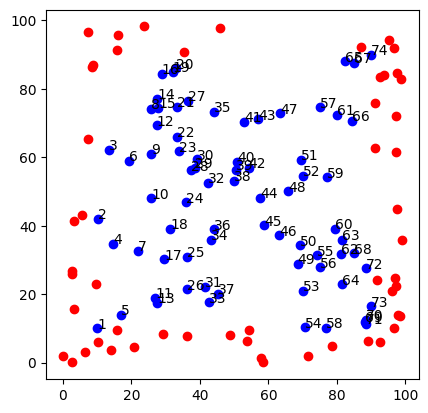

[0.00000000e+000 1.39654854e+006 3.72380579e+004 2.60198850e+003
 1.10948995e+002 3.12544257e+001 8.14244548e+001 2.55635086e+002
 5.93604080e+002 1.02926158e+003 1.34967775e+003 1.36126089e+003
 1.07552471e+003 6.77743792e+002 3.46344718e+002 1.45701471e+002
 5.11345405e+001 1.51481329e+001 3.82724140e+000 8.32236020e-001
 1.57010402e-001 2.58831876e-002 3.75192573e-003 4.80925536e-004
 5.47858469e-005 5.57158592e-006 5.07882782e-007 4.16487275e-008
 3.08260698e-009 2.06537822e-010 1.25605783e-011 6.95025875e-013
 3.50692059e-014 1.61675968e-015 6.82239517e-017 2.63937027e-018
 9.37485361e-020 3.06119729e-021 9.19983376e-023 2.54724225e-024
 6.50347166e-026 1.53226416e-027 3.33358324e-029 6.70042789e-031
 1.24474621e-032 2.13780962e-034 3.39499648e-036 4.98554264e-038
 6.76949788e-040 8.49738258e-042 9.85724822e-044 1.05624692e-045
 1.04483677e-047 9.53389794e-050 8.01721566e-052 6.20609895e-054
 4.41649227e-056 2.88483899e-058 1.72647371e-060 9.44654731e-063
 4.71404106e-065 2.139343

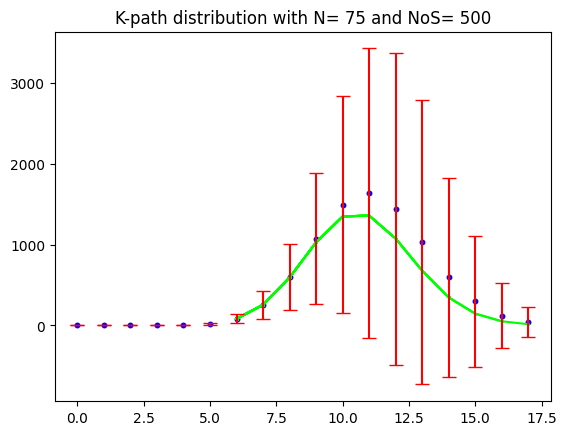

In [ ]:
#K-Path Distribution
#Endpoint: EXCLUDED
#X-axis: ExpVal | Y-axis: avg K_Path freqency over NoS nmuber of sprinklings
import math
import numpy as np
import matplotlib.pyplot as plt
from array import array
from numpy.random import default_rng
import timeit
import csv
import pandas as pd
from array import array
from scipy.special import gamma, factorial, comb
start = timeit.default_timer()

#Variables
N=75
d = 2  #number of dimensions
NoS=500
a = 100 # upper bound
b = 0 # lower bound
howfar2plot=18

ExpVal=N


counter=np.zeros(NoS)
average=np.zeros(ExpVal)
rng = np.random.default_rng()
n= rng.poisson(ExpVal, NoS)
n+=2
memory=np.zeros(shape=(NoS,np.max(n)))

def count_paths(adj_matrix):
  N = len(adj_matrix)  # Number of nodes in the graph
  path_counts = [0] * (N + 1)  # Initialize an array to store path counts by length
  def dfs(node, length):
    if length > N:  # Ignore paths longer than the number of nodes
      return
    if length and node==N-1:
      path_counts[length] += 1  # Increment the count for the current length
    for neighbor in range(N):
      if adj_matrix[node][neighbor] == 1:
        dfs(neighbor, length + 1)  # Recursive DFS call with increased length
  # Start the DFS traversal from each node
  dfs(0, 0)
  return path_counts

def longest_path_matrix(R, dmax=None):
    N = n[f]
    if dmax is None:
        dmax = N
    LP = np.zeros((N, N))
    i = 1
    B = R
    while np.sum(B) > 0.:
        path_exist = np.sign(B)
        path_length = i * path_exist
        LP = np.maximum.reduce((LP, path_length))
        B = np.dot(B, R)
        i += 1
        if i == dmax:
            return LP
    return LP

def edge_bias_compensation(target_a, target_b, graph_points): # function which returns a set of sprinkled points with edge-points eliminated
  extra=0
  fcoordy = (b-a)* np.random.random_sample((n[f],))+a # generate random y
  fcoordx = (b-a)* np.random.random_sample((n[f],))+a # generate random x
  new_n=0   # the new number of points
  for i in range(n[f]):
        if (fcoordy[i] >target_a and fcoordy[i]<target_b and fcoordx[i] >target_a and fcoordx[i]<target_b):
          new_n= new_n+1   # extract new number of points
  while new_n < n[f]:
    fcoordy = np.hstack((fcoordy, [(b-a)* np.random.random_sample()+a]))
    fcoordx = np.hstack((fcoordx, [(b-a)* np.random.random_sample()+a]))
    if (fcoordy[n[f]+extra] >target_a and fcoordy[n[f]+extra]<target_b and fcoordx[n[f]+extra] >target_a and fcoordx[n[f]+extra]<target_b):
      new_n +=1   # extra points to fill smaller box
    extra += 1 # how many additional points are added

  coordx=np.zeros(n[f])   # generate empty x
  coordy=np.zeros(n[f])   # generate empty y
  count=0
  if(rep== 0 and graph_points!= 0):  # plotting colored causal diamond for visualizing the Edge Bias Compensation (RED - Rejected Points)
    for i in range(n[f]+extra):
      if (fcoordy[i] <target_a or fcoordy[i]>target_b or fcoordx[i] <target_a or fcoordx[i]>target_b):
        plt.plot(fcoordx[i],fcoordy[i],'ro')
  for i in range(n[f]+extra):
    if (fcoordy[i] >target_a and fcoordy[i]<target_b and fcoordx[i] >target_a and fcoordx[i]<target_b):
      coordy[count]=fcoordy[i]   # copy valid x
      coordx[count]=fcoordx[i]   # copy valid y
      count =count + 1
  coordy[0]=target_a
  coordx[0]=target_a
  coordy[1]=target_b
  coordx[1]=target_b
  if(rep== 0 and graph_points!=0):
    print("\nType of fcoordx:  ", type(fcoordx))
    print("\nfcoordx:  ", fcoordx)
    print("\nLength fcoordx:  ", len(fcoordx))
    print("\ncoordx:  ", coordx)
    print("\nLength coordx:  ", len(coordx))
    print(new_n/(n[f]+extra))  # display ratio of valid points
    print("\nNo. of points in box:", new_n) # display new count
    print("\nNo. of total points", n[f]+extra)
    if(n[f]==new_n):
      print("\nYES")
    else:
      print("\nNO")
  index = np.argsort(coordx) # declare index array
  if(rep== 0 and graph_points!=0):   # plotting colored causal diamond for visualizing the Edge Bias Compensation (BLUE - Valid points)
    for i in range(n[f]):
      plt.plot(coordx[index[i]],coordy[index[i]],'bo')
      plt.text(coordx[index[i]],coordy[index[i]], i+1)
      u=(coordx[index[i]],coordy[index[i]])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
  return coordx, coordy, index, n[f]   # returns x and y coordinates of all valid points & index array & new count

for f in range(NoS):
  rep=f
  coordx, coordy, index, n[f]= edge_bias_compensation(10, 90, 1)   # call Edge Bias Compensation function, save data
  R = [[0 for x in range(n[f])] for y in range(n[f])]
  L = [[0 for x in range(n[f])] for y in range(n[f])]

    # Calculate Relation Matrix
  for i in range(n[f]):
    for j in range (n[f]):
      R[i][j]=0
      if (coordx[index[i]] < coordx[index[j]] and coordy[index[i]] < coordy[index[j]]):
        R[i][j]=1

  # Calculate Link Matrix
  for i in range(n[f]):
    for j in range (n[f]):
      L[i][j]=0
      if(R[i][j]==0):
        L[i][j]==0
      elif(i<j):
        L[i][j]=1
        for point in range (min(i,j)+1, max(i,j)):
          if(R[i][point]==1 and R[point][j]==1):
            L[i][j]=0

  path_counts=count_paths(L)
  for i in range(1, n[f]):
    memory[f][i]=path_counts[i]

# for f in range(NoS):
#   print(memory[f][10])
# print(memory[0])
# print(memory)
total_number=np.sum(memory, axis=0)
#print(total_number)
for i in range(ExpVal):
  average[i]=total_number[i]/NoS
stnd_dev=np.std(memory, axis=0)
variance=np.var(memory, axis=0)

###########################################
# ANALYTICAL Expression
###########################################

#print(np.finfo(np.longdouble))
# Here kmax is the known maximum path length (using 25 just for illustration)
kmax = N+2

fik = np.zeros((N+1,N+3))  # initialize the array to zero
fik_num_part= np.zeros((N+1,N+3))
fik_exp_part= np.zeros((N+1,N+3))

def separate_float_into_number_and_power(number):
    # Get the exponent of the number using logarithm base 10
    exponent = int(math.floor(math.log10(abs(number))))

    # Calculate the number part
    number_part = number / (10 ** exponent)

    return number_part, exponent

def multiply_floats(num1, num2):
    # Separate the numbers into number_part and exponent
    number_part1, exponent1 = separate_float_into_number_and_power(num1)
    number_part2, exponent2 = separate_float_into_number_and_power(num2)

    # Multiply the number parts
    result_number_part = number_part1 * number_part2

    # Add the exponents
    result_exponent = exponent1 + exponent2

    # Combine them into the final result
    result = result_number_part * (10 ** result_exponent)

    return result

def divide_floats(num1, num2):
    # Separate the numbers into number_part and exponent
    number_part1, exponent1 = separate_float_into_number_and_power(num1)
    number_part2, exponent2 = separate_float_into_number_and_power(num2)

    # Multiply the number parts
    result_number_part = number_part1 / number_part2

    # Add the exponents
    result_exponent = exponent1 - exponent2

    # Combine them into the final result
    result = result_number_part * (10 ** result_exponent)

    return result
# set all the values for k=1 to start the recursion
for i in range (0,N+1):
   fik[i][1] = gamma(i+1)


# recursion to fill the rest of the array
for k in range (2,N+2):
  for i in range (0,N-k+2):
    for j in range (0,i+1):
      fik[i][k] = fik[i][k] + multiply_floats(gamma(1+(i-j)*d/2), fik[j][k-1])
     # old_settings = np.seterr(all='warn', over='raise')
    fik_exp_part[i][k]=1
    fik_num_part[i][k]=1


# Now to get the mean number of k-paths (NumK) given a value of k for dimension d
NumK =0
kval=np.zeros(N+2)
for k in range(1,N+2):
  NumK = 0
  for i in range (0,N-k+2):
    add=comb(N-k+1,i) * ((-1)**(i)) * multiply_floats(divide_floats(gamma(i+1) , gamma((i+k)*d/2)),fik[i][k])
    add=divide_floats(add, gamma(1+(k-1+i)*d/2))
    NumK = NumK + add
    # if k==1 :
    #   print(NumK)
  fact_div=1
  for i in range(N-k+2, N+1):
    fact_div=fact_div*i

  kval[k] = multiply_floats(NumK , fact_div)

plotted_x = []
plotted_y = []
for k in range(6, howfar2plot):
  if kval[k]>0 and kval[k]<10**4:
    plotted_x.append(k)
    plotted_y.append(kval[k])

# Plot the dots
  plt.plot(plotted_x, plotted_y, marker='o', linestyle='-', color='lime', markersize='1')
plt.title('K-path distribution with N= %d and NoS= %d'%(N, NoS))
print(kval)
plt.plot()
yexp = []
indexfordel= [0,1,2,3,4,5]
for k in range(6,howfar2plot):
  if kval[k]>0 and kval[k]<10**4:
    yexp.append(kval[k])
  else:
    indexfordel.append(k)
print(yexp)

for i in range(howfar2plot,len(average)):
  indexfordel.append(i)
averagenew=np.delete(average,indexfordel)
print("averagenew")
print(averagenew)
chistat=[]
for i in range(len(averagenew)):
  chistat=np.append(chistat,(((averagenew[i]-yexp[i])**2)/yexp[i]))
chistat=np.sum(chistat)
print("chistat", chistat) #chisquare value comparing values to analytical expression

###########################################
# DATA EXPORT
###########################################
for i in range(howfar2plot):
  #if(sd_memory[3][i] !=0):
  plt.scatter(i, average[i], linewidths=2, c='b', s=5)
  plt.errorbar(i, average[i], yerr=stnd_dev[i], fmt=' ', ecolor='r', capsize=5)
  list0 =["chistat=%.4f"%(chistat)," "]
  for q in range(np.max(n)):
    list0.append(q)
  list2=["ExpVal= %d" %(ExpVal),"K-path Distribution"]
  list2.extend(average)
  list3=["NoS= %d" %(NoS), "Standard_Dev"]
  list3.extend(stnd_dev)
  list4=["Endpoints Excluded", "Variance"]
  list4.extend(variance)
  list5=[" ", "Analytical Estimation"]
  list5.extend(kval)
  rows = list(zip(list0, list5, list2, list3, list4))

  wtr = csv.writer(open ('EBC_KPD_EP_excluded_%d_%d.csv'%(ExpVal, NoS), 'w'), delimiter=',', lineterminator='\n')

  for row in rows :
      wtr.writerow (row)
plt.show()

stop = timeit.default_timer()


Type of fcoordx:   <class 'numpy.ndarray'>

fcoordx:   [70.0910045  22.84189866 70.91341124 87.68978087 33.17648034 15.35431485
 76.10891525 82.3581783  95.54173866 44.40842971 71.08701575 43.53726368
 64.76979446 88.07335646 12.32302909 98.09297018 59.71461056  6.47564003
 99.46864652 92.01280423  3.2790894  95.49177091 31.71398128 39.26118687
 32.02900977  1.72014987 34.66489223 47.1851236   8.72831302 83.80916928
  5.27384688 11.27499967 62.90357447 67.85254739 48.09254087 75.17588353
 21.30784848 94.45231587 88.81675529 16.6409671  17.4442457  85.94908829
 32.66502007 98.75126862 80.11144729 98.67626997  9.43442164 80.02920195
 35.12157813 11.65603808 19.75227877 39.36756658 86.79350417 52.10450233
 91.32732299 48.64611823 54.08790361 73.33899009 13.17833462 25.82450801
 83.08818354 98.53657858 62.21890355 33.63272916 75.45130452 59.96608721
 75.20851355 17.18359084  4.65855355 45.84114101  9.03048553 12.15518187
 79.71956304 82.05143461 36.64895589 89.55928219  7.84538169 58.5669

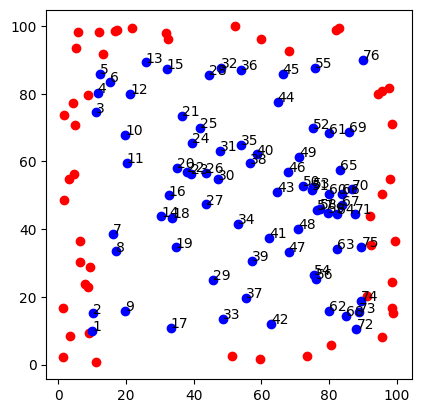

[0.00000000e+000 1.39654854e+006 3.72380579e+004 2.60198850e+003
 1.10948995e+002 3.12544257e+001 8.14244548e+001 2.55635086e+002
 5.93604080e+002 1.02926158e+003 1.34967775e+003 1.36126089e+003
 1.07552471e+003 6.77743792e+002 3.46344718e+002 1.45701471e+002
 5.11345405e+001 1.51481329e+001 3.82724140e+000 8.32236020e-001
 1.57010402e-001 2.58831876e-002 3.75192573e-003 4.80925536e-004
 5.47858469e-005 5.57158592e-006 5.07882782e-007 4.16487275e-008
 3.08260698e-009 2.06537822e-010 1.25605783e-011 6.95025875e-013
 3.50692059e-014 1.61675968e-015 6.82239517e-017 2.63937027e-018
 9.37485361e-020 3.06119729e-021 9.19983376e-023 2.54724225e-024
 6.50347166e-026 1.53226416e-027 3.33358324e-029 6.70042789e-031
 1.24474621e-032 2.13780962e-034 3.39499648e-036 4.98554264e-038
 6.76949788e-040 8.49738258e-042 9.85724822e-044 1.05624692e-045
 1.04483677e-047 9.53389794e-050 8.01721566e-052 6.20609895e-054
 4.41649227e-056 2.88483899e-058 1.72647371e-060 9.44654731e-063
 4.71404106e-065 2.139343

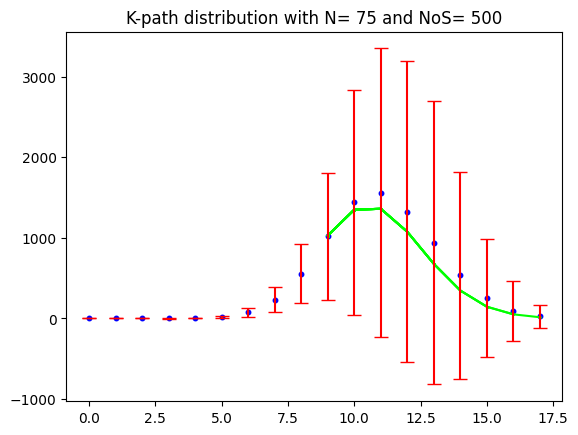

In [ ]:
#K-Path Distribution
#Endpoint: INCLUDED
#X-axis: ExpVal | Y-axis: avg K_Path freqency over NoS nmuber of sprinklings
import math
import numpy as np
import matplotlib.pyplot as plt
from array import array
from numpy.random import default_rng
import timeit
import csv
import pandas as pd
from array import array
from scipy.special import gamma, factorial, comb
start = timeit.default_timer()

#Variables
N=75
d = 2  #number of dimensions
NoS=500
a = 100 # upper bound
b = 0 # lower bound
howfar2plot=18

ExpVal=N


counter=np.zeros(NoS)
average=np.zeros(ExpVal)
rng = np.random.default_rng()
n= rng.poisson(ExpVal, NoS)
memory=np.zeros(shape=(NoS,np.max(n)))

def count_paths(adj_matrix):
  N = len(adj_matrix)  # Number of nodes in the graph
  path_counts = [0] * (N + 1)  # Initialize an array to store path counts by length
  def dfs(node, length):
    if length > N:  # Ignore paths longer than the number of nodes
      return
    if length and node==N-1:
      path_counts[length] += 1  # Increment the count for the current length
    for neighbor in range(N):
      if adj_matrix[node][neighbor] == 1:
        dfs(neighbor, length + 1)  # Recursive DFS call with increased length
  # Start the DFS traversal from each node
  dfs(0, 0)
  return path_counts

def longest_path_matrix(R, dmax=None):
    N = n[f]
    if dmax is None:
        dmax = N
    LP = np.zeros((N, N))
    i = 1
    B = R
    while np.sum(B) > 0.:
        path_exist = np.sign(B)
        path_length = i * path_exist
        LP = np.maximum.reduce((LP, path_length))
        B = np.dot(B, R)
        i += 1
        if i == dmax:
            return LP
    return LP

def edge_bias_compensation(target_a, target_b, graph_points): # function which returns a set of sprinkled points with edge-points eliminated
  extra=0
  fcoordy = (b-a)* np.random.random_sample((n[f],))+a # generate random y
  fcoordx = (b-a)* np.random.random_sample((n[f],))+a # generate random x
  new_n=0   # the new number of points
  for i in range(n[f]):
        if (fcoordy[i] >target_a and fcoordy[i]<target_b and fcoordx[i] >target_a and fcoordx[i]<target_b):
          new_n= new_n+1   # extract new number of points
  while new_n < n[f]:
    fcoordy = np.hstack((fcoordy, [(b-a)* np.random.random_sample()+a]))
    fcoordx = np.hstack((fcoordx, [(b-a)* np.random.random_sample()+a]))
    if (fcoordy[n[f]+extra] >target_a and fcoordy[n[f]+extra]<target_b and fcoordx[n[f]+extra] >target_a and fcoordx[n[f]+extra]<target_b):
      new_n +=1   # extra points to fill smaller box
    extra += 1 # how many additional points are added

  coordx=np.zeros(n[f])   # generate empty x
  coordy=np.zeros(n[f])   # generate empty y
  count=0
  if(rep== 0 and graph_points!= 0):  # plotting colored causal diamond for visualizing the Edge Bias Compensation (RED - Rejected Points)
    for i in range(n[f]+extra):
      if (fcoordy[i] <target_a or fcoordy[i]>target_b or fcoordx[i] <target_a or fcoordx[i]>target_b):
        plt.plot(fcoordx[i],fcoordy[i],'ro')
  for i in range(n[f]+extra):
    if (fcoordy[i] >target_a and fcoordy[i]<target_b and fcoordx[i] >target_a and fcoordx[i]<target_b):
      coordy[count]=fcoordy[i]   # copy valid x
      coordx[count]=fcoordx[i]   # copy valid y
      count =count + 1
  coordy[0]=target_a
  coordx[0]=target_a
  coordy[1]=target_b
  coordx[1]=target_b
  if(rep== 0 and graph_points!=0):
    print("\nType of fcoordx:  ", type(fcoordx))
    print("\nfcoordx:  ", fcoordx)
    print("\nLength fcoordx:  ", len(fcoordx))
    print("\ncoordx:  ", coordx)
    print("\nLength coordx:  ", len(coordx))
    print(new_n/(n[f]+extra))  # display ratio of valid points
    print("\nNo. of points in box:", new_n) # display new count
    print("\nNo. of total points", n[f]+extra)
    if(n[f]==new_n):
      print("\nYES")
    else:
      print("\nNO")
  index = np.argsort(coordx) # declare index array
  if(rep== 0 and graph_points!=0):   # plotting colored causal diamond for visualizing the Edge Bias Compensation (BLUE - Valid points)
    for i in range(n[f]):
      plt.plot(coordx[index[i]],coordy[index[i]],'bo')
      plt.text(coordx[index[i]],coordy[index[i]], i+1)
      u=(coordx[index[i]],coordy[index[i]])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
  return coordx, coordy, index, n[f]   # returns x and y coordinates of all valid points & index array & new count

for f in range(NoS):
  rep=f
  coordx, coordy, index, n[f]= edge_bias_compensation(10, 90, 1)   # call Edge Bias Compensation function, save data
  R = [[0 for x in range(n[f])] for y in range(n[f])]
  L = [[0 for x in range(n[f])] for y in range(n[f])]

    # Calculate Relation Matrix
  for i in range(n[f]):
    for j in range (n[f]):
      R[i][j]=0
      if (coordx[index[i]] < coordx[index[j]] and coordy[index[i]] < coordy[index[j]]):
        R[i][j]=1

  # Calculate Link Matrix
  for i in range(n[f]):
    for j in range (n[f]):
      L[i][j]=0
      if(R[i][j]==0):
        L[i][j]==0
      elif(i<j):
        L[i][j]=1
        for point in range (min(i,j)+1, max(i,j)):
          if(R[i][point]==1 and R[point][j]==1):
            L[i][j]=0

  path_counts=count_paths(L)
  for i in range(1, n[f]):
    memory[f][i]=path_counts[i]

# for f in range(NoS):
#   print(memory[f][10])
# print(memory[0])
# print(memory)
total_number=np.sum(memory, axis=0)
#print(total_number)
for i in range(ExpVal):
  average[i]=total_number[i]/NoS
stnd_dev=np.std(memory, axis=0)
variance=np.var(memory, axis=0)

###########################################
# ANALYTICAL Expression
###########################################

#print(np.finfo(np.longdouble))
# Here kmax is the known maximum path length (using 25 just for illustration)
kmax = N+2

fik = np.zeros((N+1,N+3))  # initialize the array to zero
fik_num_part= np.zeros((N+1,N+3))
fik_exp_part= np.zeros((N+1,N+3))

def separate_float_into_number_and_power(number):
    # Get the exponent of the number using logarithm base 10
    exponent = int(math.floor(math.log10(abs(number))))

    # Calculate the number part
    number_part = number / (10 ** exponent)

    return number_part, exponent

def multiply_floats(num1, num2):
    # Separate the numbers into number_part and exponent
    number_part1, exponent1 = separate_float_into_number_and_power(num1)
    number_part2, exponent2 = separate_float_into_number_and_power(num2)

    # Multiply the number parts
    result_number_part = number_part1 * number_part2

    # Add the exponents
    result_exponent = exponent1 + exponent2

    # Combine them into the final result
    result = result_number_part * (10 ** result_exponent)

    return result

def divide_floats(num1, num2):
    # Separate the numbers into number_part and exponent
    number_part1, exponent1 = separate_float_into_number_and_power(num1)
    number_part2, exponent2 = separate_float_into_number_and_power(num2)

    # Multiply the number parts
    result_number_part = number_part1 / number_part2

    # Add the exponents
    result_exponent = exponent1 - exponent2

    # Combine them into the final result
    result = result_number_part * (10 ** result_exponent)

    return result
# set all the values for k=1 to start the recursion
for i in range (0,N+1):
   fik[i][1] = gamma(i+1)


# recursion to fill the rest of the array
for k in range (2,N+2):
  for i in range (0,N-k+2):
    for j in range (0,i+1):
      fik[i][k] = fik[i][k] + multiply_floats(gamma(1+(i-j)*d/2), fik[j][k-1])
     # old_settings = np.seterr(all='warn', over='raise')
    fik_exp_part[i][k]=1
    fik_num_part[i][k]=1


# Now to get the mean number of k-paths (NumK) given a value of k for dimension d
NumK =0
kval=np.zeros(N+2)
for k in range(1,N+2):
  NumK = 0
  for i in range (0,N-k+2):
    add=comb(N-k+1,i) * ((-1)**(i)) * multiply_floats(divide_floats(gamma(i+1) , gamma((i+k)*d/2)),fik[i][k])
    add=divide_floats(add, gamma(1+(k-1+i)*d/2))
    NumK = NumK + add
    # if k==1 :
    #   print(NumK)
  fact_div=1
  for i in range(N-k+2, N+1):
    fact_div=fact_div*i

  kval[k] = multiply_floats(NumK , fact_div)

plotted_x = []
plotted_y = []
for k in range(9, howfar2plot):
  if kval[k]>0 and kval[k]<10**4:
    plotted_x.append(k)
    plotted_y.append(kval[k])

# Plot the dots
  plt.plot(plotted_x, plotted_y, marker='o', linestyle='-', color='lime', markersize='1')
plt.title('K-path distribution with N= %d and NoS= %d'%(N, NoS))
print(kval)
plt.plot()
yexp = []
indexfordel= [0,1,2,3,4,5]
for k in range(6,howfar2plot):
  if kval[k]>0 and kval[k]<10**4:
    yexp.append(kval[k])
  else:
    indexfordel.append(k)
print(yexp)

for i in range(howfar2plot,len(average)):
  indexfordel.append(i)
averagenew=np.delete(average,indexfordel)
print("averagenew")
print(averagenew)
chistat=[]
for i in range(len(averagenew)):
  chistat=np.append(chistat,(((averagenew[i]-yexp[i])**2)/yexp[i]))
chistat=np.sum(chistat)
print("chistat", chistat) #chisquare value comparing values to analytical expression

###########################################
# DATA EXPORT
###########################################
for i in range(howfar2plot):
  #if(sd_memory[3][i] !=0):
  plt.scatter(i, average[i], linewidths=2, c='b', s=5)
  plt.errorbar(i, average[i], yerr=stnd_dev[i], fmt=' ', ecolor='r', capsize=5)
  list0 =["chistat=%.4f"%(chistat)," "]
  for q in range(np.max(n)):
    list0.append(q)
  list2=["ExpVal= %d" %(ExpVal),"K-path Distribution"]
  list2.extend(average)
  list3=["NoS= %d" %(NoS), "Standard_Dev"]
  list3.extend(stnd_dev)
  list4=["Endpoints Included", "Variance"]
  list4.extend(variance)
  list5=[" ", "Analytical Estimation"]
  list5.extend(kval)
  rows = list(zip(list0, list5, list2, list3, list4))

  wtr = csv.writer(open ('EBC_KPD_EP_included_%d_%d.csv'%(ExpVal, NoS), 'w'), delimiter=',', lineterminator='\n')

  for row in rows :
      wtr.writerow (row)
plt.show()

stop = timeit.default_timer()


Type of fcoordx:   <class 'numpy.ndarray'>

fcoordx:   [33.11520351 99.54770265 86.7237457  72.20579618 77.04682625  1.26114077
 86.76270965 68.72618441 21.03149822 32.76005612 60.8201651  89.55914749
 28.02006233 48.50207733 68.15476761 45.50318202 79.15564409 71.67821261
 50.33058475 16.43436064 22.5371614  99.66827386 50.31940181 85.25713273
 86.50783303 65.03578599 10.78901439 52.75613385 30.26471978 47.15381193
 63.34526691 31.68071521  3.09955134 56.73179445  4.12595095  8.97026569
 14.8315558   9.84379792 44.54648202 28.02779792 13.41886981 69.579912
 94.17528372 46.80105064 11.1758283  26.0364531  81.90405227 91.10891408
 53.38261996 90.16869015 51.8039803  67.15053061 45.17702765  5.8204061
 48.95877765 32.51811575 11.33665402 76.22287748 44.88956404 69.47571989
 80.37275069 61.50784267 27.34251925 66.00207417 64.55830767 32.4674717
 57.91641378  7.51493867 31.56756422 73.26678385 93.34418479 95.22127601
 59.6572706  65.40383121  8.93077015 63.60200754 79.66841804  1.46059514

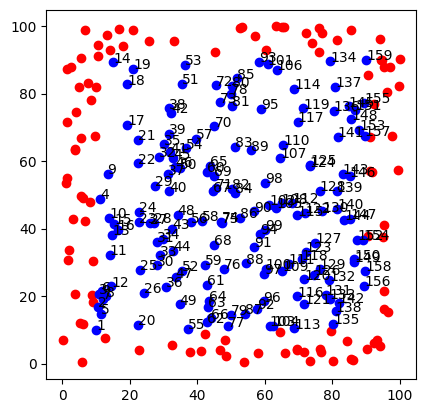

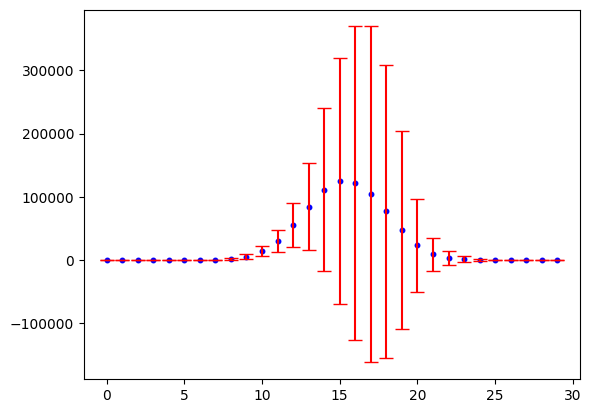

In [ ]:
#K-Path Distribution WITHOUT ANALYTICAL EXPRESSION
#Endpoint: INCLUDED
#X-axis: ExpVal | Y-axis: avg K_Path freqency over NoS nmuber of sprinklings
import math
import numpy as np
import matplotlib.pyplot as plt
from array import array
from numpy.random import default_rng
import timeit
import csv
import pandas as pd
from array import array
from scipy.special import gamma, factorial, comb
start = timeit.default_timer()

#Variables
N=150
d = 2  #number of dimensions
NoS=50
a = 100 # upper bound
b = 0 # lower bound
howfar2plot=30

ExpVal=N


counter=np.zeros(NoS)

rng = np.random.default_rng()
n= rng.poisson(ExpVal, NoS)
average=np.zeros(np.max(n))
memory=np.zeros(shape=(NoS,np.max(n)))

def count_paths(adj_matrix):
  N = len(adj_matrix)  # Number of nodes in the graph
  path_counts = [0] * (N + 1)  # Initialize an array to store path counts by length
  def dfs(node, length):
    if length > N:  # Ignore paths longer than the number of nodes
      return
    if length and node==N-1:
      path_counts[length] += 1  # Increment the count for the current length
    for neighbor in range(N):
      if adj_matrix[node][neighbor] == 1:
        dfs(neighbor, length + 1)  # Recursive DFS call with increased length
  # Start the DFS traversal from each node
  dfs(0, 0)
  return path_counts

def longest_path_matrix(R, dmax=None):
    N = n[f]
    if dmax is None:
        dmax = N
    LP = np.zeros((N, N))
    i = 1
    B = R
    while np.sum(B) > 0.:
        path_exist = np.sign(B)
        path_length = i * path_exist
        LP = np.maximum.reduce((LP, path_length))
        B = np.dot(B, R)
        i += 1
        if i == dmax:
            return LP
    return LP

def edge_bias_compensation(target_a, target_b, graph_points): # function which returns a set of sprinkled points with edge-points eliminated
  extra=0
  fcoordy = (b-a)* np.random.random_sample((n[f],))+a # generate random y
  fcoordx = (b-a)* np.random.random_sample((n[f],))+a # generate random x
  new_n=0   # the new number of points
  for i in range(n[f]):
        if (fcoordy[i] >target_a and fcoordy[i]<target_b and fcoordx[i] >target_a and fcoordx[i]<target_b):
          new_n= new_n+1   # extract new number of points
  while new_n < n[f]:
    fcoordy = np.hstack((fcoordy, [(b-a)* np.random.random_sample()+a]))
    fcoordx = np.hstack((fcoordx, [(b-a)* np.random.random_sample()+a]))
    if (fcoordy[n[f]+extra] >target_a and fcoordy[n[f]+extra]<target_b and fcoordx[n[f]+extra] >target_a and fcoordx[n[f]+extra]<target_b):
      new_n +=1   # extra points to fill smaller box
    extra += 1 # how many additional points are added

  coordx=np.zeros(n[f])   # generate empty x
  coordy=np.zeros(n[f])   # generate empty y
  count=0
  if(rep== 0 and graph_points!= 0):  # plotting colored causal diamond for visualizing the Edge Bias Compensation (RED - Rejected Points)
    for i in range(n[f]+extra):
      if (fcoordy[i] <target_a or fcoordy[i]>target_b or fcoordx[i] <target_a or fcoordx[i]>target_b):
        plt.plot(fcoordx[i],fcoordy[i],'ro')
  for i in range(n[f]+extra):
    if (fcoordy[i] >target_a and fcoordy[i]<target_b and fcoordx[i] >target_a and fcoordx[i]<target_b):
      coordy[count]=fcoordy[i]   # copy valid x
      coordx[count]=fcoordx[i]   # copy valid y
      count =count + 1
  coordy[0]=target_a
  coordx[0]=target_a
  coordy[1]=target_b
  coordx[1]=target_b
  if(rep== 0 and graph_points!=0):
    print("\nType of fcoordx:  ", type(fcoordx))
    print("\nfcoordx:  ", fcoordx)
    print("\nLength fcoordx:  ", len(fcoordx))
    print("\ncoordx:  ", coordx)
    print("\nLength coordx:  ", len(coordx))
    print(new_n/(n[f]+extra))  # display ratio of valid points
    print("\nNo. of points in box:", new_n) # display new count
    print("\nNo. of total points", n[f]+extra)
    if(n[f]==new_n):
      print("\nYES")
    else:
      print("\nNO")
  index = np.argsort(coordx) # declare index array
  if(rep== 0 and graph_points!=0):   # plotting colored causal diamond for visualizing the Edge Bias Compensation (BLUE - Valid points)
    for i in range(n[f]):
      plt.plot(coordx[index[i]],coordy[index[i]],'bo')
      plt.text(coordx[index[i]],coordy[index[i]], i+1)
      u=(coordx[index[i]],coordy[index[i]])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
  return coordx, coordy, index, n[f]   # returns x and y coordinates of all valid points & index array & new count

for f in range(NoS):
  rep=f
  coordx, coordy, index, n[f]= edge_bias_compensation(10, 90, 1)   # call Edge Bias Compensation function, save data
  R = [[0 for x in range(n[f])] for y in range(n[f])]
  L = [[0 for x in range(n[f])] for y in range(n[f])]

    # Calculate Relation Matrix
  for i in range(n[f]):
    for j in range (n[f]):
      R[i][j]=0
      if (coordx[index[i]] < coordx[index[j]] and coordy[index[i]] < coordy[index[j]]):
        R[i][j]=1

  # Calculate Link Matrix
  for i in range(n[f]):
    for j in range (n[f]):
      L[i][j]=0
      if(R[i][j]==0):
        L[i][j]==0
      elif(i<j):
        L[i][j]=1
        for point in range (min(i,j)+1, max(i,j)):
          if(R[i][point]==1 and R[point][j]==1):
            L[i][j]=0

  path_counts=count_paths(L)
  for i in range(1, n[f]):
    memory[f][i]=path_counts[i]

# for f in range(NoS):
#   print(memory[f][10])
# print(memory[0])
# print(memory)
total_number=np.sum(memory, axis=0)
#print(total_number)
for i in range(max(n)):
  average[i]=total_number[i]/NoS
stnd_dev=np.std(memory, axis=0)
variance=np.var(memory, axis=0)

###########################################
# DATA EXPORT
###########################################
for i in range(howfar2plot):
  #if(sd_memory[3][i] !=0):
  plt.scatter(i, average[i], linewidths=2, c='b', s=5)
  plt.errorbar(i, average[i], yerr=stnd_dev[i], fmt=' ', ecolor='r', capsize=5)
  list0 =[""," "]
  for q in range(np.max(n)):
    list0.append(q)
  list2=["ExpVal= %d" %(ExpVal),"K-path Distribution"]
  list2.extend(average)
  list3=["NoS= %d" %(NoS), "Standard_Dev"]
  list3.extend(stnd_dev)
  list4=["Endpoints Included", "Variance"]
  list4.extend(variance)

  rows = list(zip(list0, list2, list3, list4))

  wtr = csv.writer(open ('EBC_KPD_EP_included_NOANALYTICAL_%d_%d.csv'%(ExpVal, NoS), 'w'), delimiter=',', lineterminator='\n')

  for row in rows :
      wtr.writerow (row)
plt.show()

stop = timeit.default_timer()